# Project Name: Movie Search and Recommendation Application
- Subject: MFG 598 (Engineering Computing with Python)
- Name: Jay Bhanushali
- Email ID: jbhanus1@asu.edu
- ASU ID: 1225902017

# The Dataset can be downloaded through below links

- Netflix Dataset Link: https://www.kaggle.com/datasets/shivamb/netflix-shows

- Amazon Dataset Link: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tvshows?resource=download

# Flowchart of the Project

### Netflix Dataset
    Step 1: Load Netflix Dataset
    Step 2: Data Cleaning
    Step 3: Data Visualization
    Step 4: Word Cloud
    
### Amazon Dataset
    Step 1: Load Amazon Dataset
    Step 2: Data Cleaning
    Step 3: Data Visualization
    Step 4: Word Cloud
    
### Netflix and Amazon combined Dataset
    Step 1: Data Visualization

### Recommendation Analysis using NLTK

### Importing all the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Netflix Dataset

In [2]:
# Loading the Netflix Dataset using Pandas Dataframe

netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [3]:
# Characteristics of the Dataset:

print("\033[1mShape of the Dataset:\033[0m", netflix.shape)
print("--------------------------------------------------")
print("\033[1mColumns of the Dataset:\033[0m", netflix.columns)
print("--------------------------------------------------")
print("\033[1mChecking the Null values:\033[0m\n", netflix.isnull().sum())
print("--------------------------------------------------")
print("\033[1mChecking the Uniques Values:\033[0m\n", netflix.nunique())
print("--------------------------------------------------")
print("\033[1mChecking for Duplicate values:\033[0m", netflix.duplicated().sum())

Shape of the Dataset: (8807, 12)
--------------------------------------------------
Columns of the Dataset: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
--------------------------------------------------
Checking the Null values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Checking the Uniques Values:
 show_id         8807
type               2
title           8804
director        4528
cast            7692
country           70
date_added      1767
release_year      74
rating            14
duration         220
listed_in        514
description     8775
dtype: int64
---------------------------

### Data Cleaning

In [4]:
# Making a copy of the priginal dataset for Data Cleaning and Data Visualization

df_netflix = netflix.copy()

In [5]:
# Shape of the new dataset

print("\033[1mShape of the new dataset:\033[0m", df_netflix.shape)


Shape of the new dataset: (8807, 12)


In [6]:
# Drop NULL values

df_netflix = df_netflix.dropna()
print("\033[1mShape of the new dataset after droppong all the Null Values:\033[0m", df_netflix.shape)
print("The dropna() fucntion method drops the rows containing atleast one missing value. This is important for Data Visualization to ensure that the data is clean and complete.")

Shape of the new dataset after droppong all the Null Values: (5332, 12)
The dropna() fucntion method drops the rows containing atleast one missing value. This is important for Data Visualization to ensure that the data is clean and complete.


In [7]:
# Printing 5 random values after dropping all the Null Values

df_netflix.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast         country  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   United States   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   United States   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...         Germany   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...           India   

            date_added  release_year rating   duration  \
7   September 24, 2021          1993  TV-MA    125 min   
8   September 24, 2021          2021  TV-14  9 Seasons   
9   September 24, 2021          2021  PG-13    104 min   
12  September 23, 2021          2021  TV-MA    127 min   
24  September 21, 2021          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  
7   On a photo shoot in Ghana, an American model s...  
8   A talented batch of amateur bakers face off in...  
9   A woman adjusting to life after a loss contend...  
12  After most of her family is murdered in a terr...  
24  When the father of the man she loves insists t...

In [8]:
# Converting to Date Time format

df_netflix["date_added"] = pd.to_datetime(df_netflix['date_added'])
df_netflix['day_added'] = df_netflix['date_added'].dt.day
df_netflix['year_added'] = df_netflix['date_added'].dt.year
df_netflix['month_added']=df_netflix['date_added'].dt.month
df_netflix['year_added'].astype(int);
df_netflix['day_added'].astype(int);

In [9]:
# Printing 5 random values after changing the Data to Date Time Format

df_netflix.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast         country  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   United States   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   United States   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...         Germany   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...           India   

   date_added  release_year rating   duration  \
7  2021-09-24          1993  TV-MA    125 min   
8  2021-09-24          2021  TV-14  9 Seasons   
9  2021-09-24          2021  PG-13    104 min   
12 2021-09-23          2021  TV-MA    127 min   
24 2021-09-21          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  day_added  year_added  \
7   On a photo shoot in Ghana, an American model s...         24        2021   
8   A talented batch of amateur bakers face off in...         24        2021   
9   A woman adjusting to life after a loss contend...         24        2021   
12  After most of her family is murdered in a terr...         23        2021   
24  When the father of the man she loves insists t...         21        2021   

    month_added  
7             9  
8             9  
9             9  
12            9  
24            9

# Data Visulaization on Netflix Dataset

##### 1. Type: Movie and TV Shows

C:\Users\Jay Bhanushali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type')

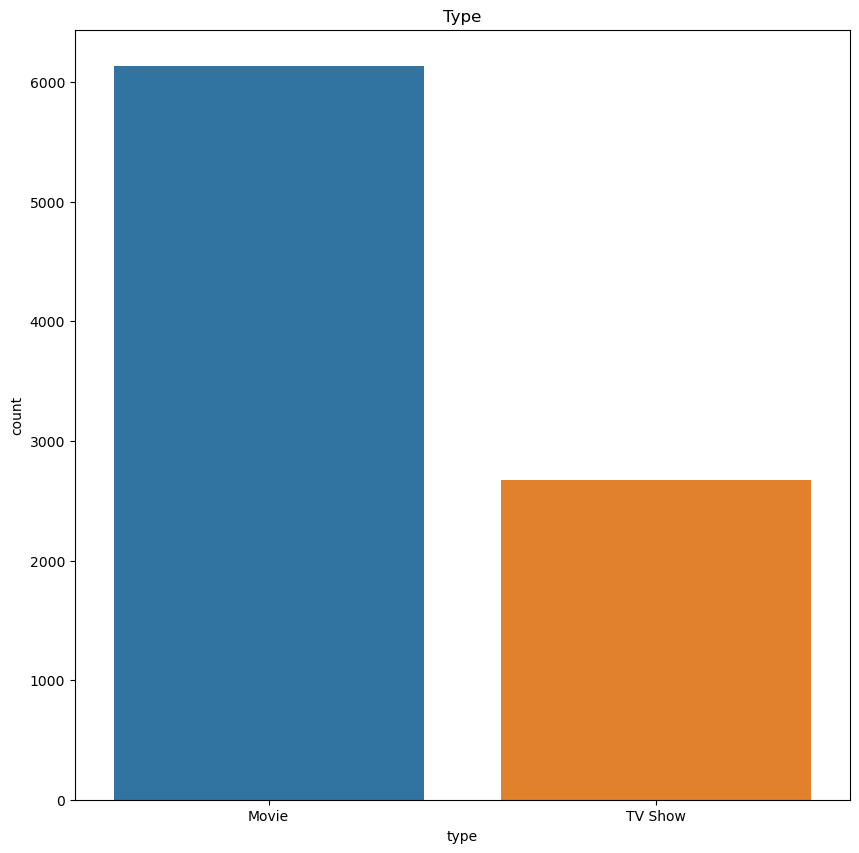

In [10]:
sns.countplot(netflix['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

##### 2. Rating of shows and movies

C:\Users\Jay Bhanushali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jay Bhanushali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jay Bhanushali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating_Netflix')

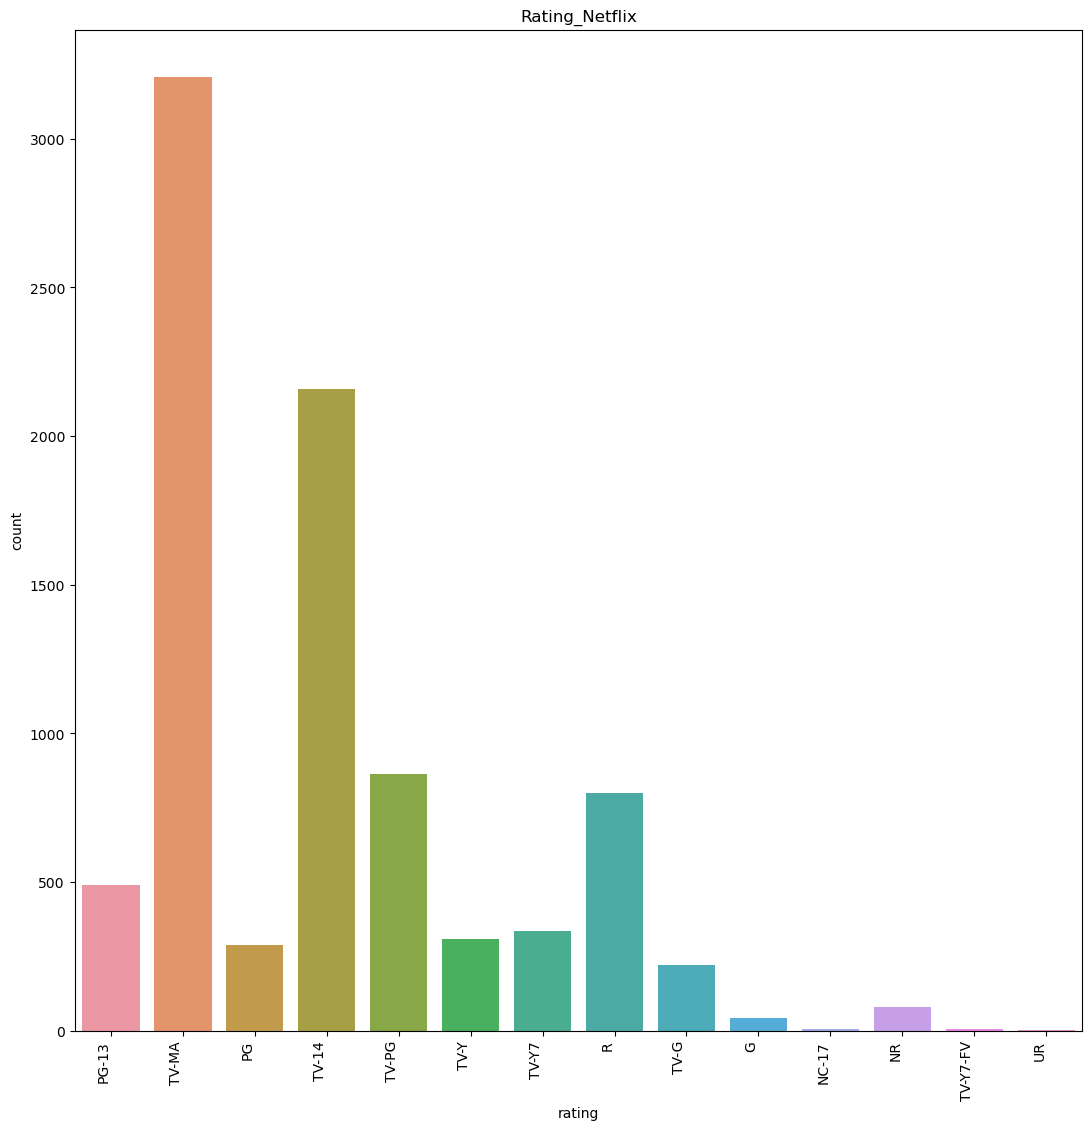

In [11]:
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating_Netflix')

##### 3. Relation between Type and Rating

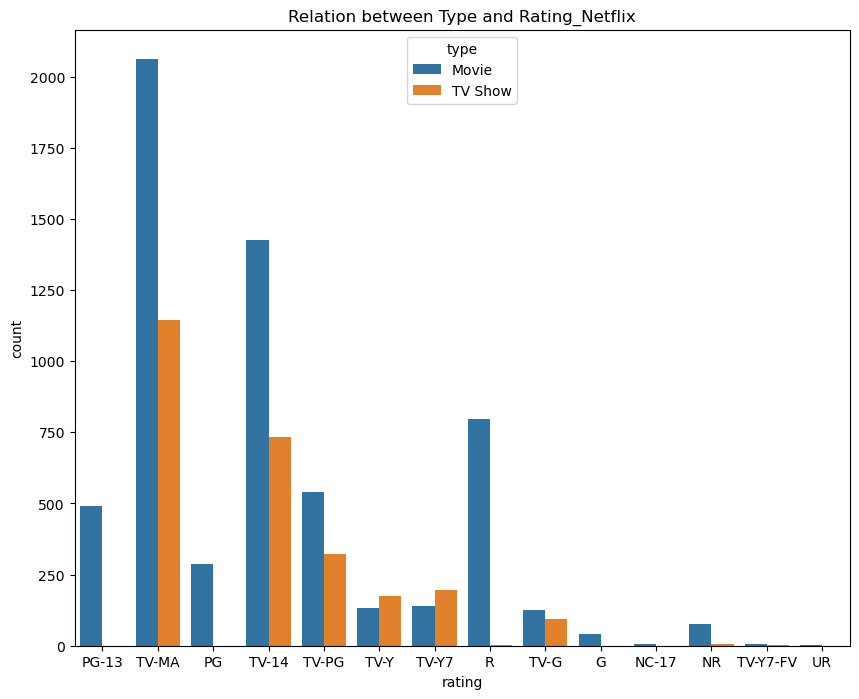

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating_Netflix')
plt.show()

##### 4. Pie-chart for the Type: Movie and TV Shows

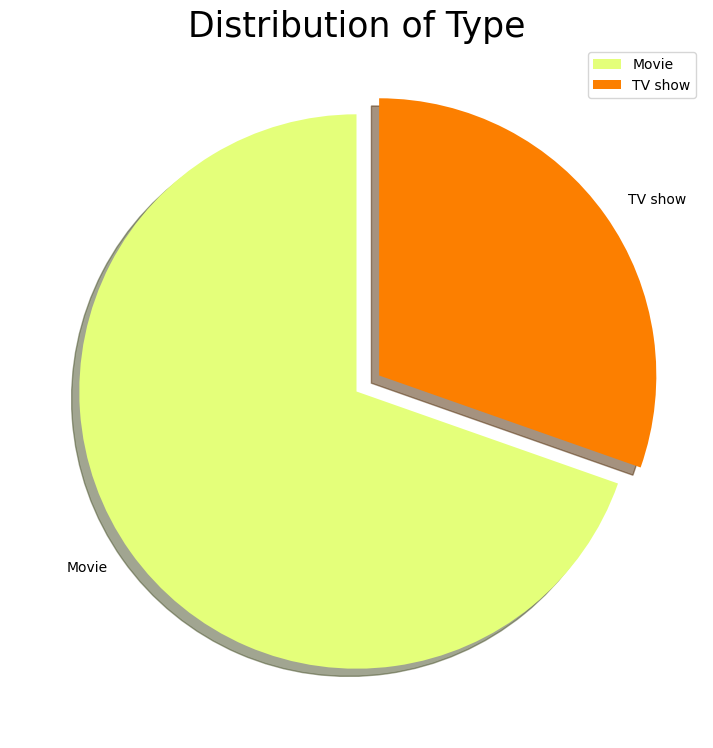

In [13]:
labels = ['Movie', 'TV show']
size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

##### 5. Pie-chart for Rating

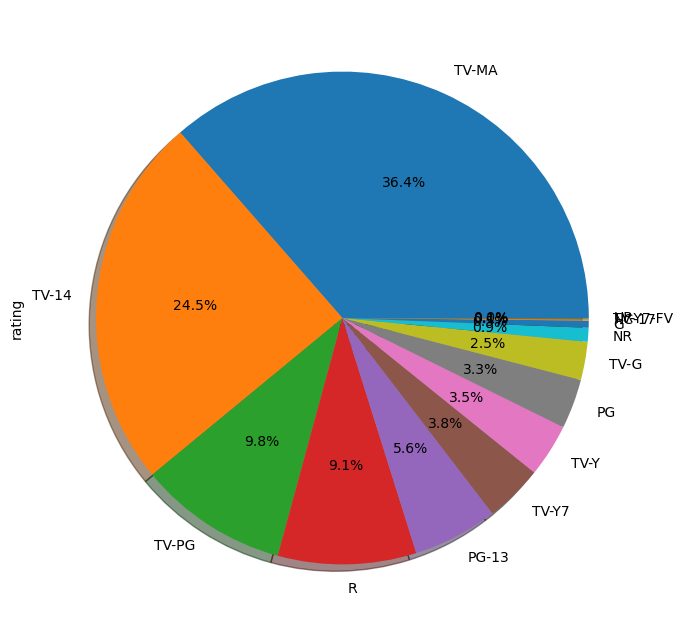

In [14]:
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# Word Cloud Netflix
A word cloud is a graphical representation of text data that displays the most frequently used words in a large block of text or document. They are commonly used in social media, marketing, and data analysis.

In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud

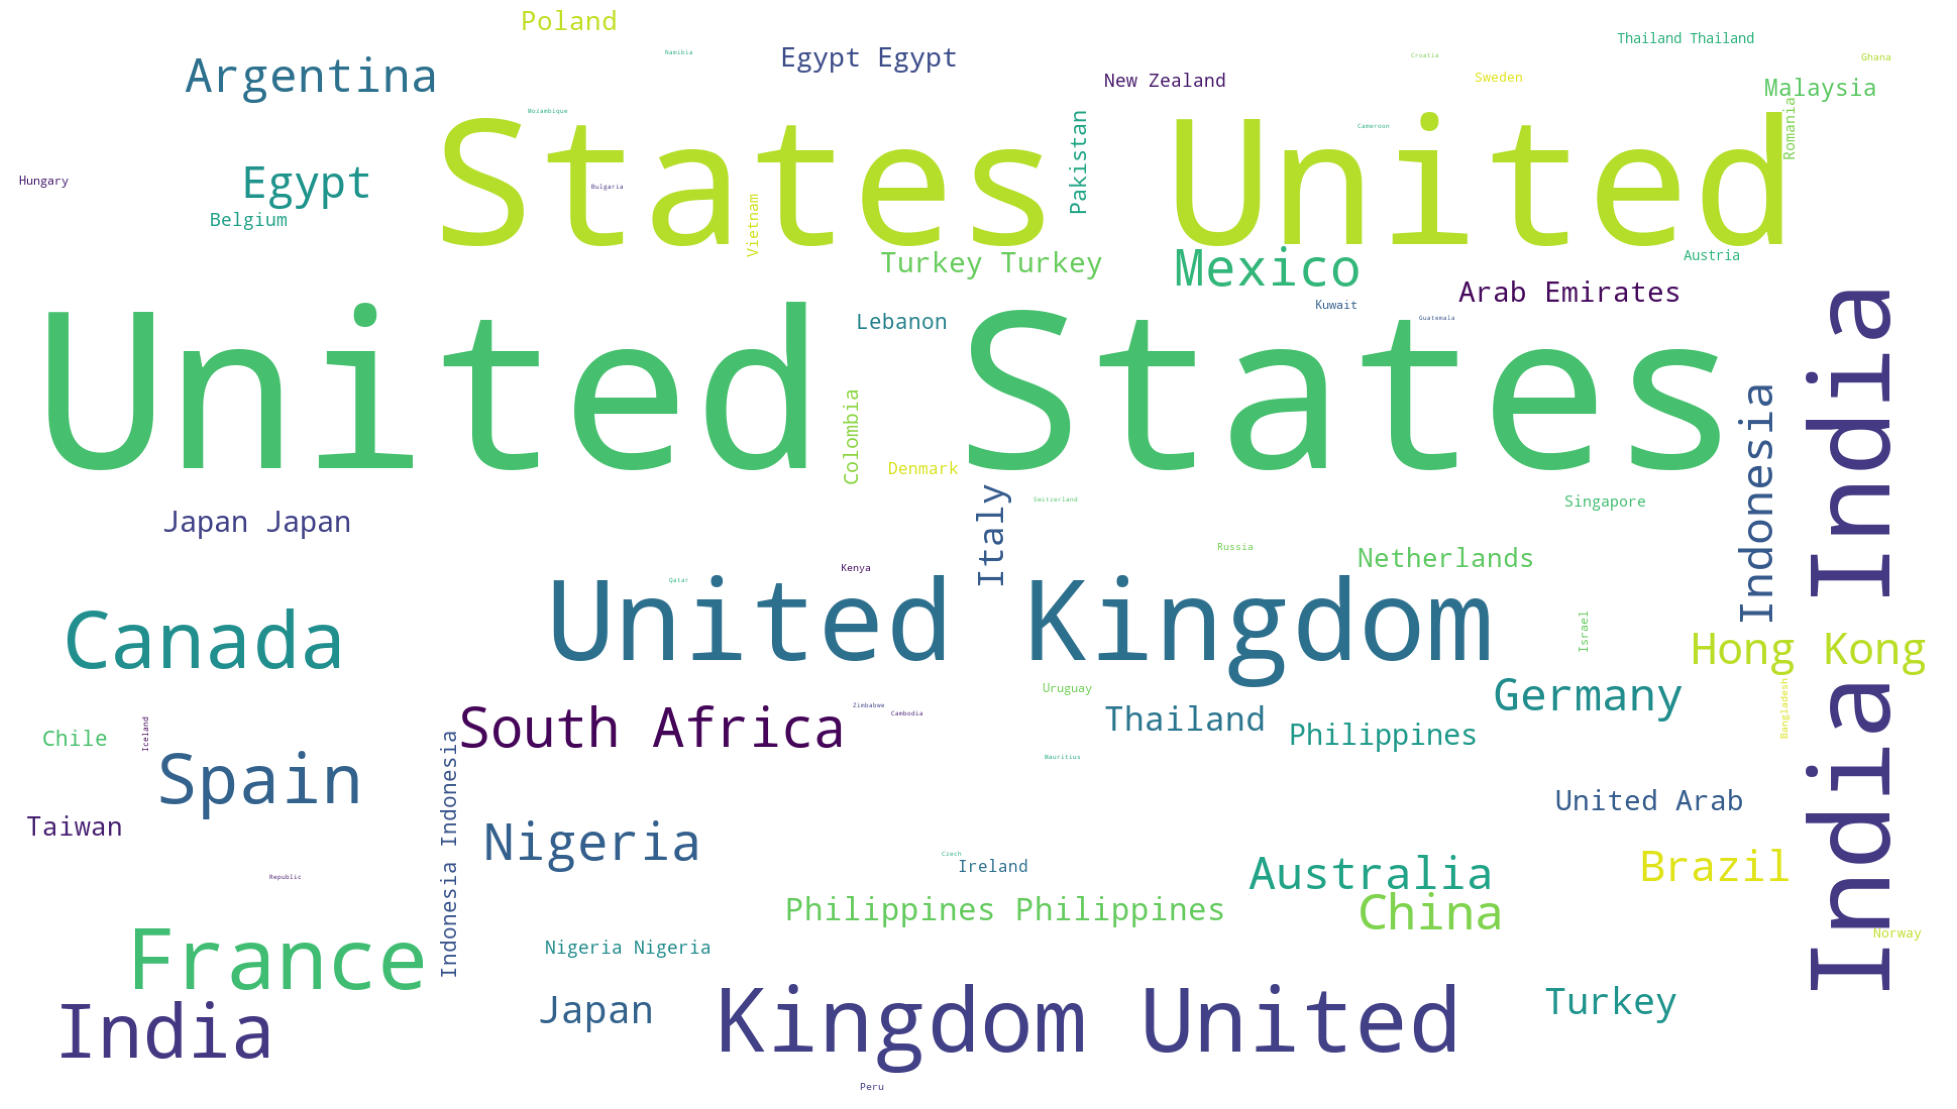

In [17]:
# Word Cloud of Countries

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_netflix.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country_netflix.png')
plt.show()

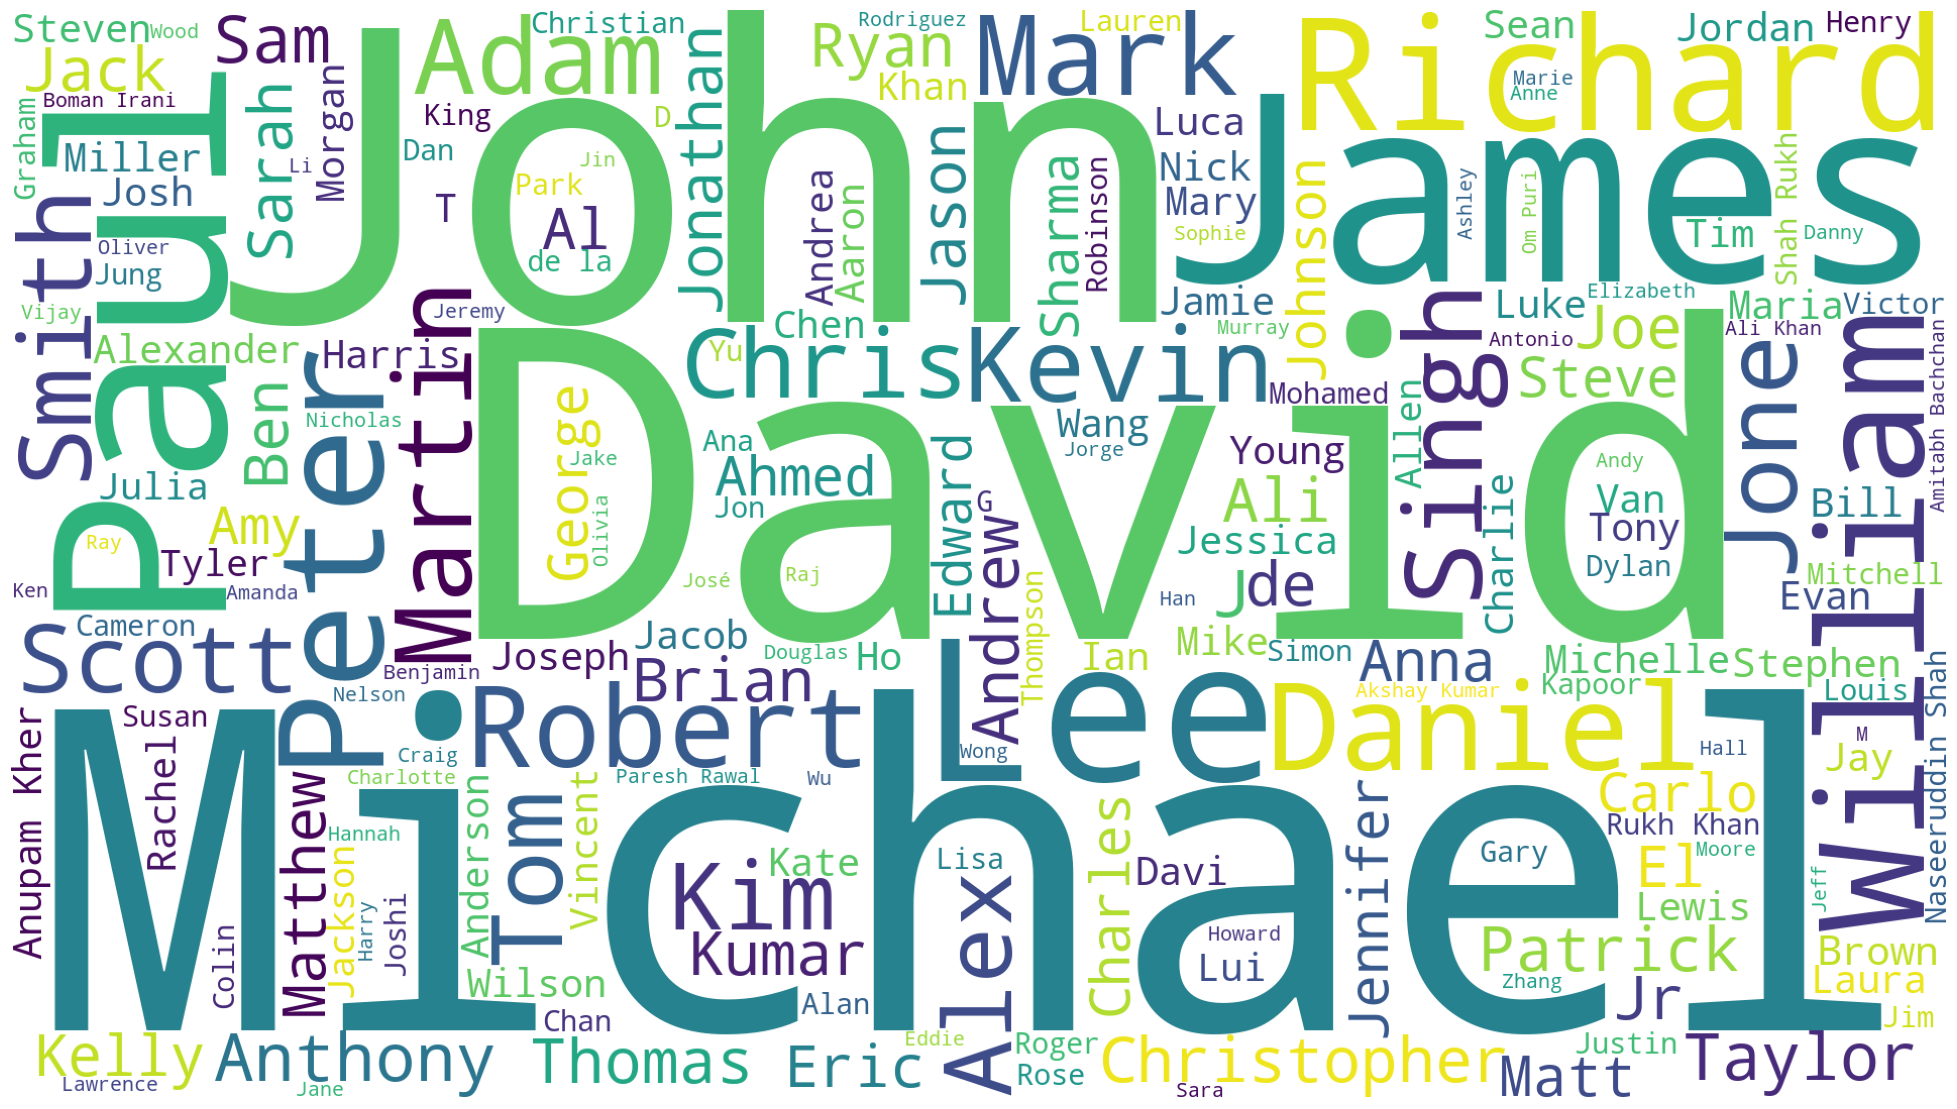

In [18]:
# Word Cloud of Cast in the Shows

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_netflix.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast_netflix.png')
plt.show()

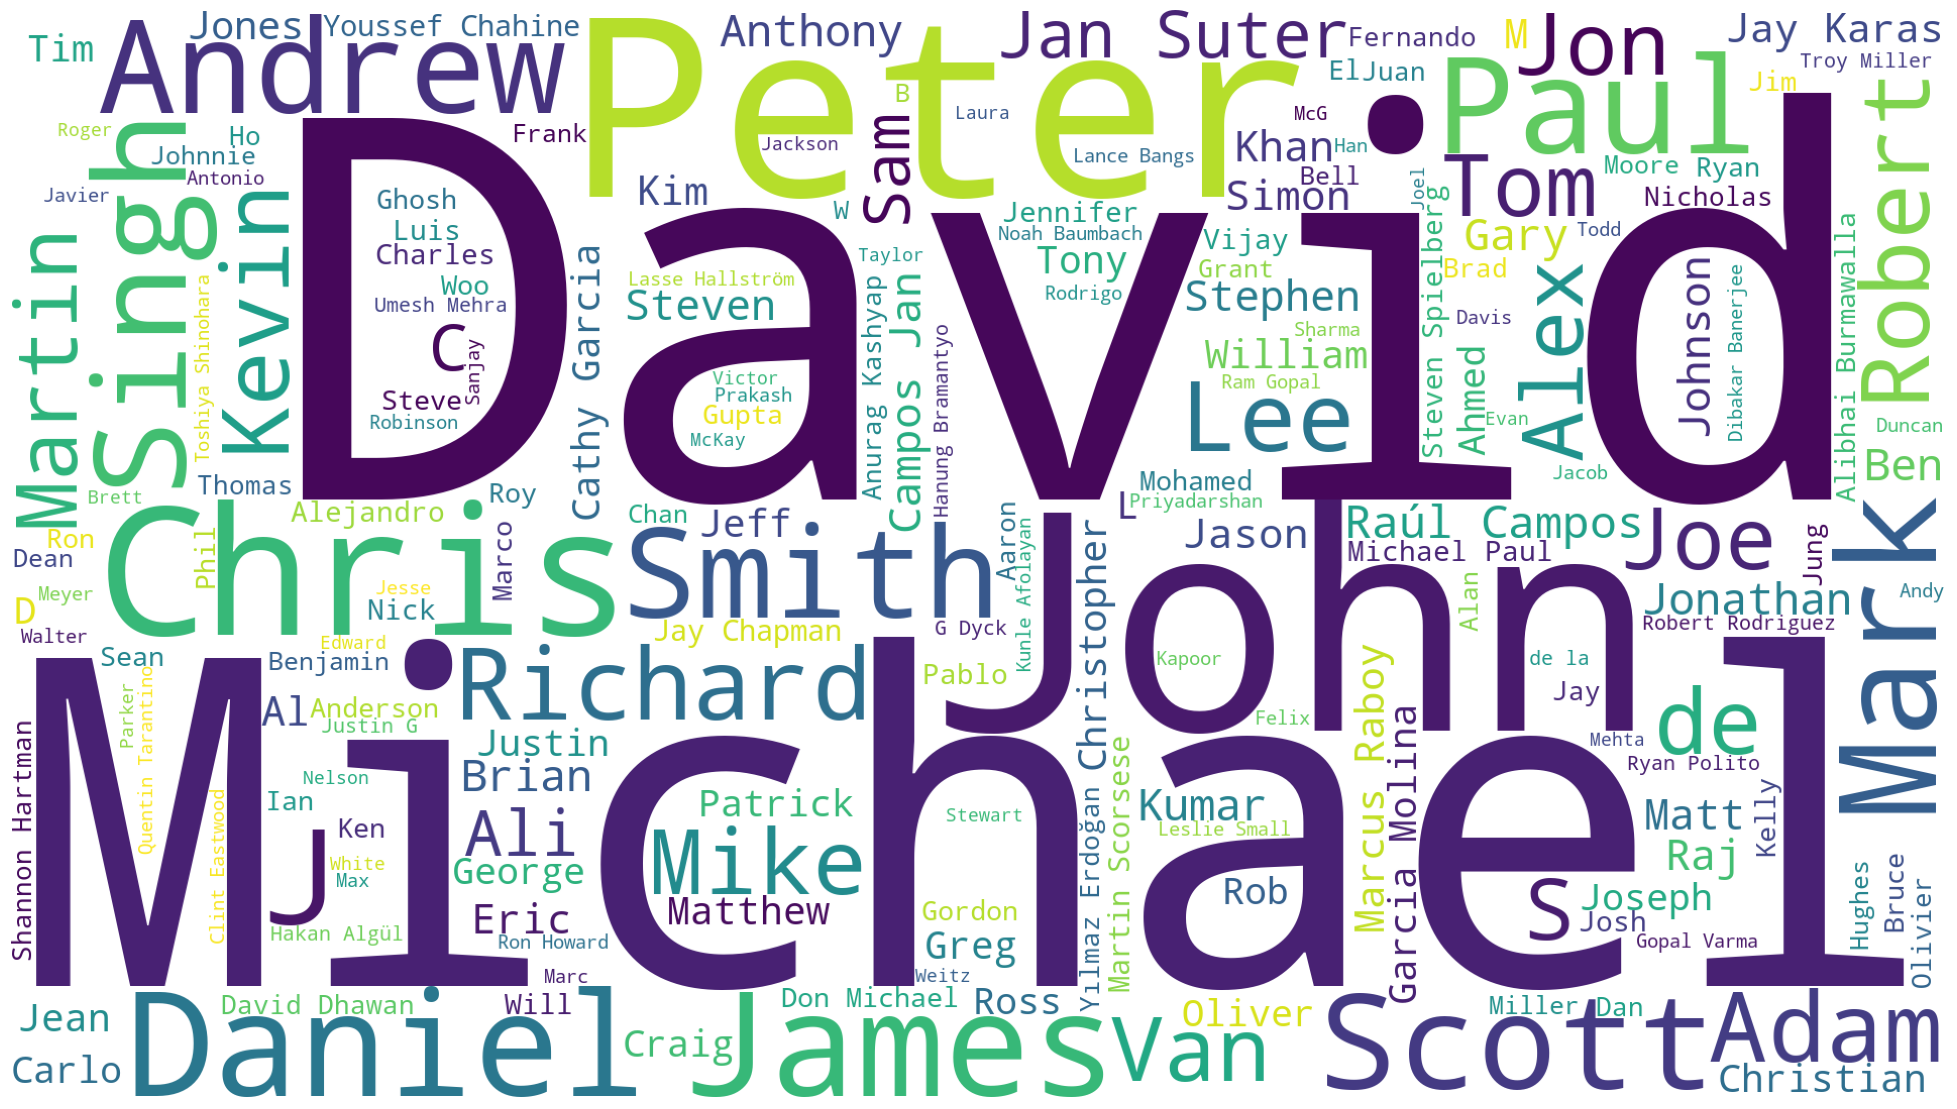

In [19]:
# Word Cloud of Directors 

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_netflix.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director_netflix.png')
plt.show()

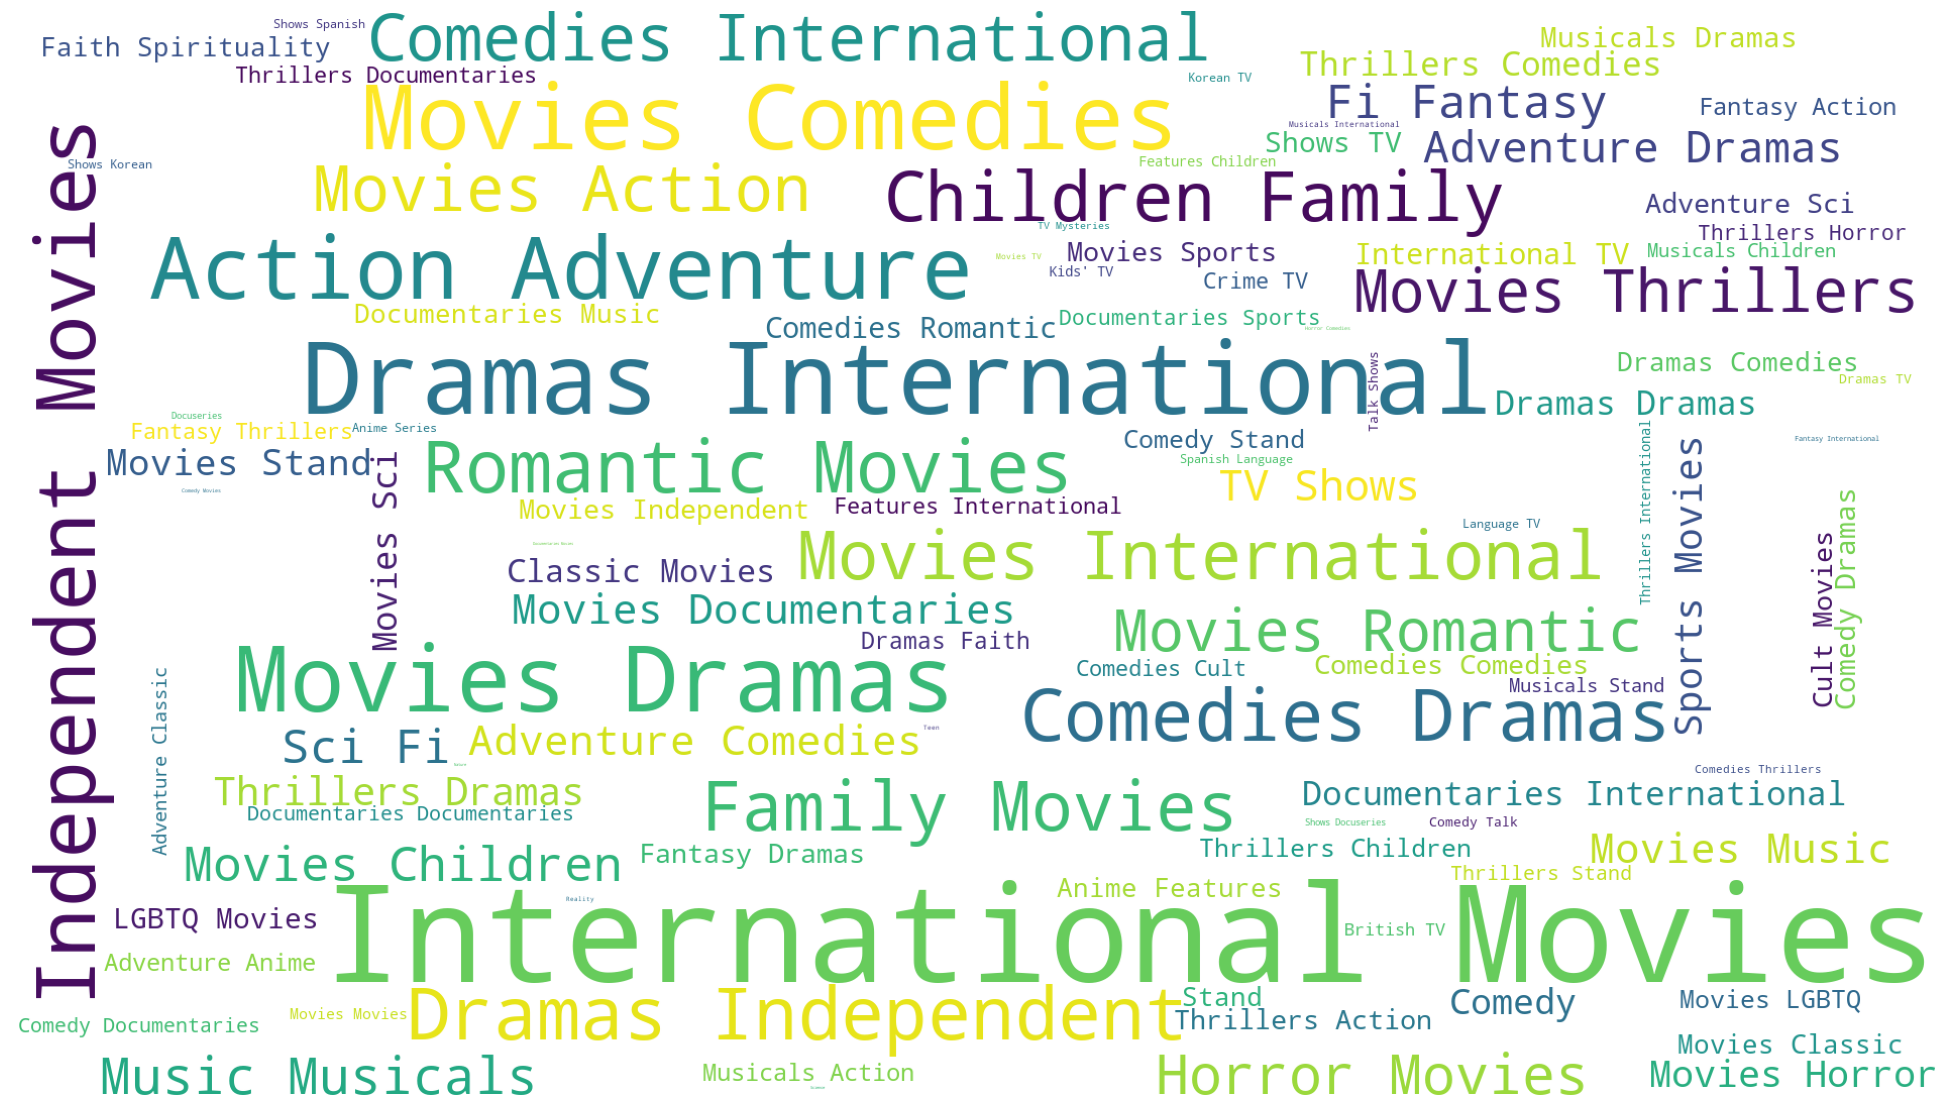

In [20]:
# Word Cloud of Categories

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_netflix.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category_netflix.png')
plt.show()

# Amazon Dataset

In [21]:
# Loading the Amazon Dataset using Pandas Dataframe

amazon = pd.read_csv('amazon_prime_titles.csv')
amazon.head()

show_id     type                 title        director  \
0      s1    Movie   The Grand Seduction    Don McKellar   
1     s18  TV Show            Zoo Babies             NaN   
2      s2    Movie  Take Care Good Night    Girish Joshi   
3      s3    Movie  Secrets of Deception     Josh Webber   
4      s4    Movie    Pink: Staying True  Sonia Anderson   

                                                cast        country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent  United States   
1                         Narrator - Gillian Barlett          Egypt   
2   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar  United States   
3  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...  United States   
4  Interviews with: Pink, Adele, Beyoncé, Britney...            NaN   

       date_added  release_year rating  duration                listed_in  \
0  March 30, 2021          2014    NaN   113 min            Comedy, Drama   
1    July 7, 2018          2008    ALL  1 Season   Kids, Special Interest   
2  March 30, 2021          2018    13+   110 min     Drama, International   
3  March 30, 2021          2017    NaN    74 min  Action, Drama, Suspense   
4  March 30, 2021          2014    NaN    69 min              Documentary   

                                         description  
0  A small fishing village must procure a local d...  
1  A heart warming and inspiring series that welc...  
2  A Metro Family decides to fight a Cyber Crimin...  
3  After a man discovers his wife is cheating on ...  
4  Pink breaks the mold once again, bringing her ...

In [22]:
# Characteristics of the Dataset:

print("\033[1mShape of the Dataset:\033[0m", amazon.shape)
print("--------------------------------------------------")
print("\033[1mColumns of the Dataset:\033[0m", amazon.columns)
print("--------------------------------------------------")
print("\033[1mChecking the Null values:\033[0m\n", amazon.isnull().sum())
print("--------------------------------------------------")
print("\033[1mChecking the Uniques Values:\033[0m\n", amazon.nunique())
print("--------------------------------------------------")
print("\033[1mChecking for Duplicate values:\033[0m", amazon.duplicated().sum())

Shape of the Dataset: (9669, 12)
--------------------------------------------------
Columns of the Dataset: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
--------------------------------------------------
Checking the Null values:
 show_id            0
type               0
title              0
director        2083
cast            1233
country         1746
date_added         0
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Checking the Uniques Values:
 show_id         9668
type               2
title           9668
director        5774
cast            7927
country           83
date_added      2822
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64
---------------------------

In [23]:
# Making a copy of the priginal dataset for Data Cleaning and Data Visualization

df_amazon = amazon.copy()

In [24]:
# Shape of the new dataset

print("\033[1mShape of the new dataset:\033[0m", df_amazon.shape)

Shape of the new dataset: (9669, 12)


In [25]:
# Drop NULL values

df_amazon = df_amazon.dropna()
print("\033[1mShape of the new dataset after droppong all the Null Values:\033[0m", df_amazon.shape)

Shape of the new dataset after droppong all the Null Values: (5361, 12)


In [26]:
# Printing 5 random values after dropping all the Null Values

df_amazon.head()

show_id   type                 title       director  \
2       s2  Movie  Take Care Good Night   Girish Joshi   
20     s20  Movie                   Zoe  Drake Doremus   
23     s23  Movie          Zis Boom Bah   William Nigh   
25     s25  Movie              Zandalee  Sam Pillsbury   
33     s33  Movie          Young Lovers     Ida Lupino   

                                                 cast               country  \
2    Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar         United States   
20  Ewan McGregor, Léa Seydoux, Theo James, Mirand...         United States   
23                            Grace Hayes, Mary Healy  United Arab Emirates   
25  Nicolas Cage, Judge Reinhold, Erika Anderson, ...         United States   
33  Sally Forrest, Keefe Brasselle, Hugh O'Brian, ...           Philippines   

           date_added  release_year rating duration  \
2      March 30, 2021          2018    13+  110 min   
20       July 6, 2019          2018      R  104 min   
23       June 3, 2014          1941     NR   62 min   
25       July 7, 2019          1991      R   94 min   
33  February 23, 2016          1949    18+   86 min   

                                          listed_in  \
2                              Drama, International   
20                                  Science Fiction   
23  Arts, Entertainment, and Culture, Comedy, Drama   
25                                            Drama   
33                                            Drama   

                                          description  
2   A Metro Family decides to fight a Cyber Crimin...  
20  ZOE tells a tale of forbidden love between an ...  
23  "Hey, kids, let's get together and put on a sh...  
25  Zandalee has grown bored with her poet-turned-...  
33  Talented and beautiful Carol Williams (Forrest...

In [27]:
# Converting to Date Time format

df_amazon["date_added"] = pd.to_datetime(df_amazon['date_added'])
df_amazon['day_added'] = df_amazon['date_added'].dt.day
df_amazon['year_added'] = df_amazon['date_added'].dt.year
df_amazon['month_added']=df_amazon['date_added'].dt.month
df_amazon['year_added'].astype(int);
df_amazon['day_added'].astype(int);

In [28]:
# Printing 5 random values after changing the Data to Date Time Format

df_amazon.head()

show_id   type                 title       director  \
2       s2  Movie  Take Care Good Night   Girish Joshi   
20     s20  Movie                   Zoe  Drake Doremus   
23     s23  Movie          Zis Boom Bah   William Nigh   
25     s25  Movie              Zandalee  Sam Pillsbury   
33     s33  Movie          Young Lovers     Ida Lupino   

                                                 cast               country  \
2    Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar         United States   
20  Ewan McGregor, Léa Seydoux, Theo James, Mirand...         United States   
23                            Grace Hayes, Mary Healy  United Arab Emirates   
25  Nicolas Cage, Judge Reinhold, Erika Anderson, ...         United States   
33  Sally Forrest, Keefe Brasselle, Hugh O'Brian, ...           Philippines   

   date_added  release_year rating duration  \
2  2021-03-30          2018    13+  110 min   
20 2019-07-06          2018      R  104 min   
23 2014-06-03          1941     NR   62 min   
25 2019-07-07          1991      R   94 min   
33 2016-02-23          1949    18+   86 min   

                                          listed_in  \
2                              Drama, International   
20                                  Science Fiction   
23  Arts, Entertainment, and Culture, Comedy, Drama   
25                                            Drama   
33                                            Drama   

                                          description  day_added  year_added  \
2   A Metro Family decides to fight a Cyber Crimin...         30        2021   
20  ZOE tells a tale of forbidden love between an ...          6        2019   
23  "Hey, kids, let's get together and put on a sh...          3        2014   
25  Zandalee has grown bored with her poet-turned-...          7        2019   
33  Talented and beautiful Carol Williams (Forrest...         23        2016   

    month_added  
2             3  
20            7  
23            6  
25            7  
33            2

# Data Visualization on Amazon Dataset

##### 1. Type: Movie and TV Shows

C:\Users\Jay Bhanushali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type')

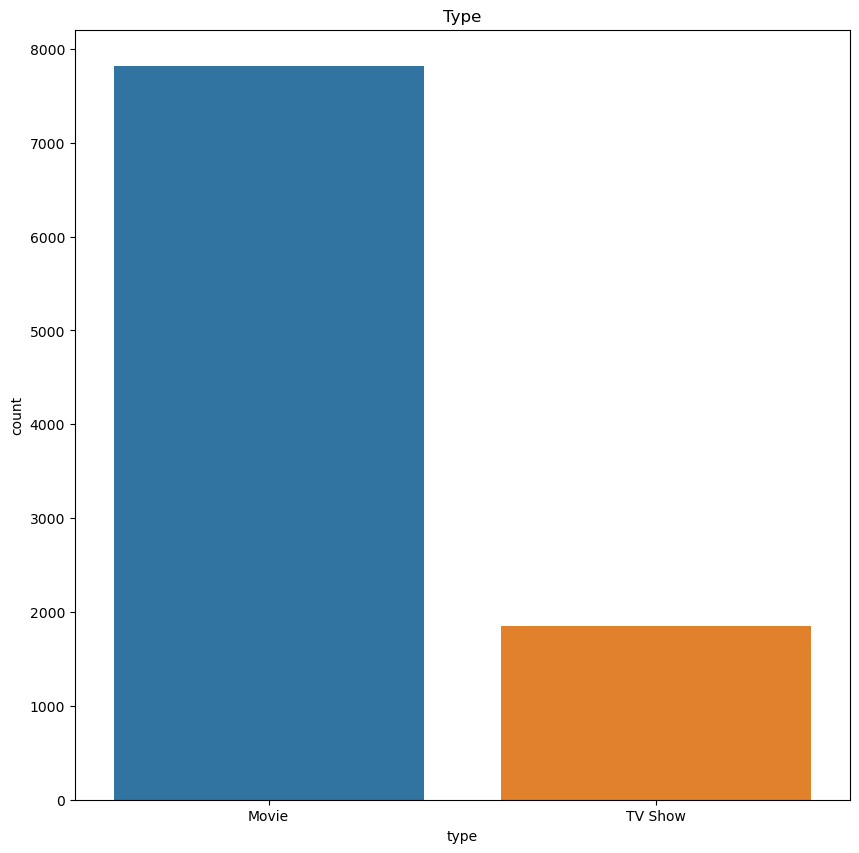

In [29]:
sns.countplot(amazon['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

##### 2. Rating of shows and movies

C:\Users\Jay Bhanushali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jay Bhanushali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jay Bhanushali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating_Amazon')

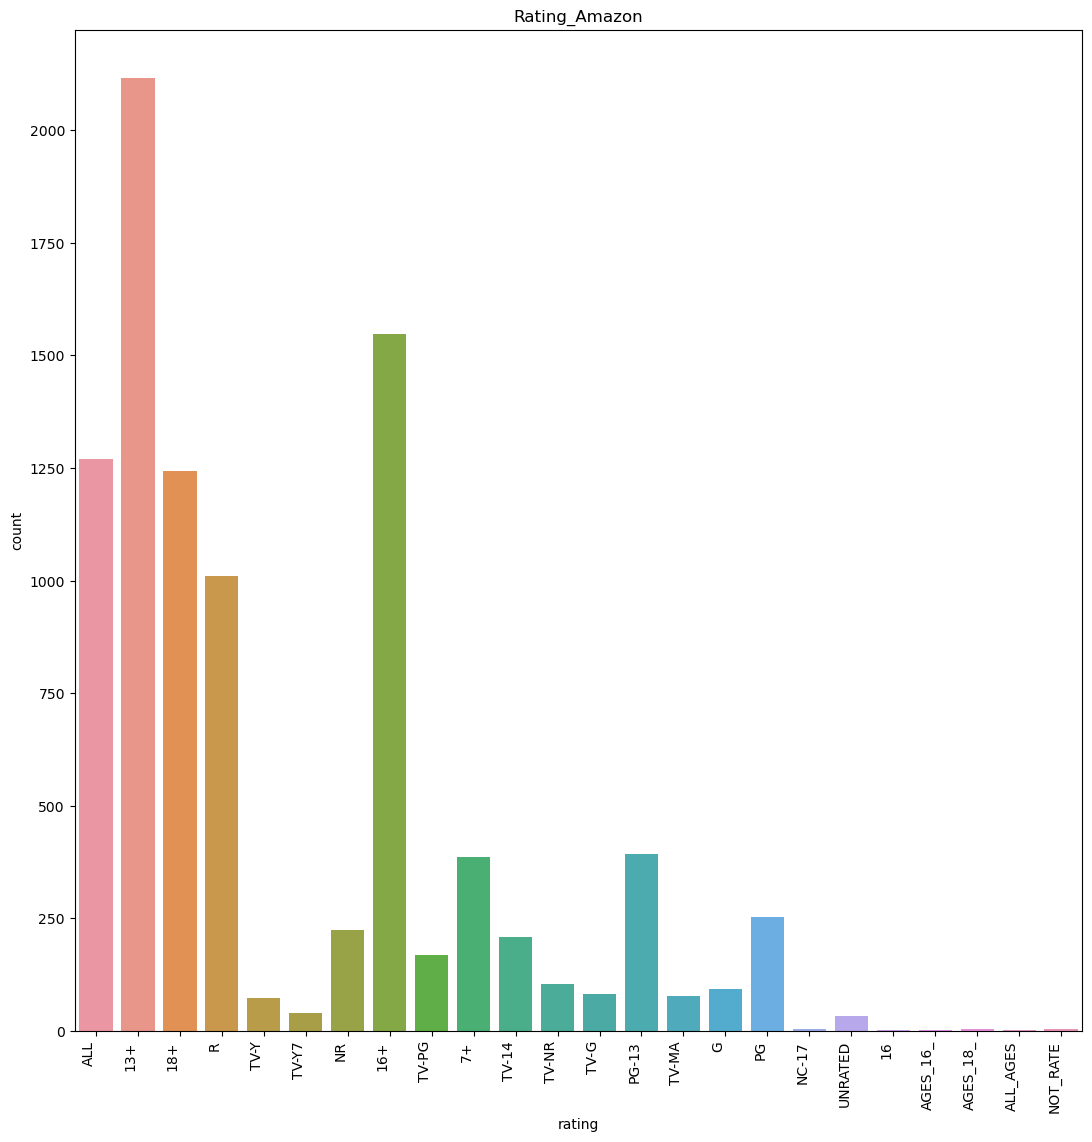

In [30]:
sns.countplot(amazon['rating'])
sns.countplot(amazon['rating']).set_xticklabels(sns.countplot(amazon['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating_Amazon')

##### 3. Relation between Type and Rating

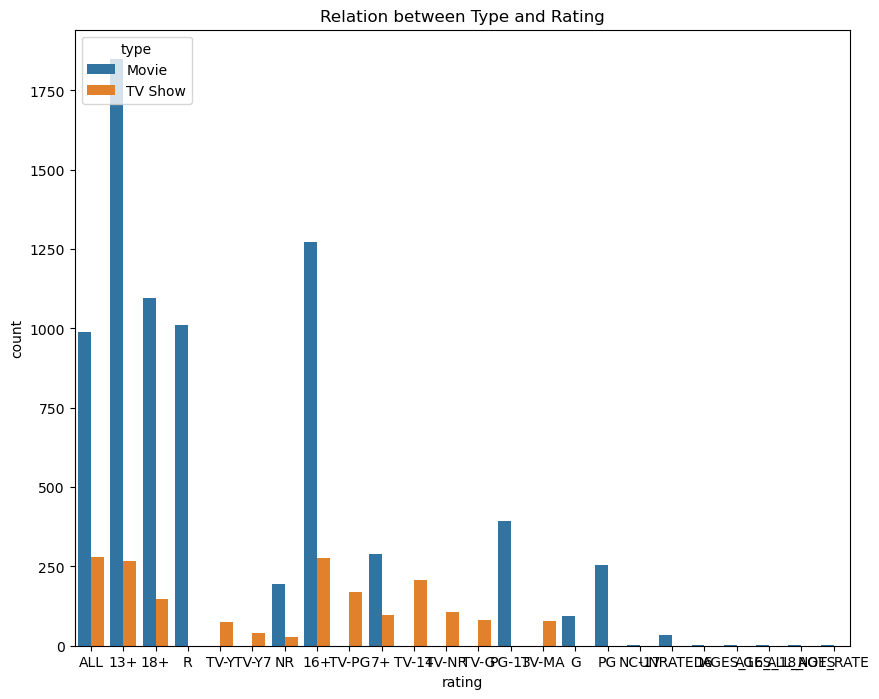

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=amazon)
plt.title('Relation between Type and Rating')
plt.show()

##### 4. Pie-chart for the Type: Movie and TV Shows

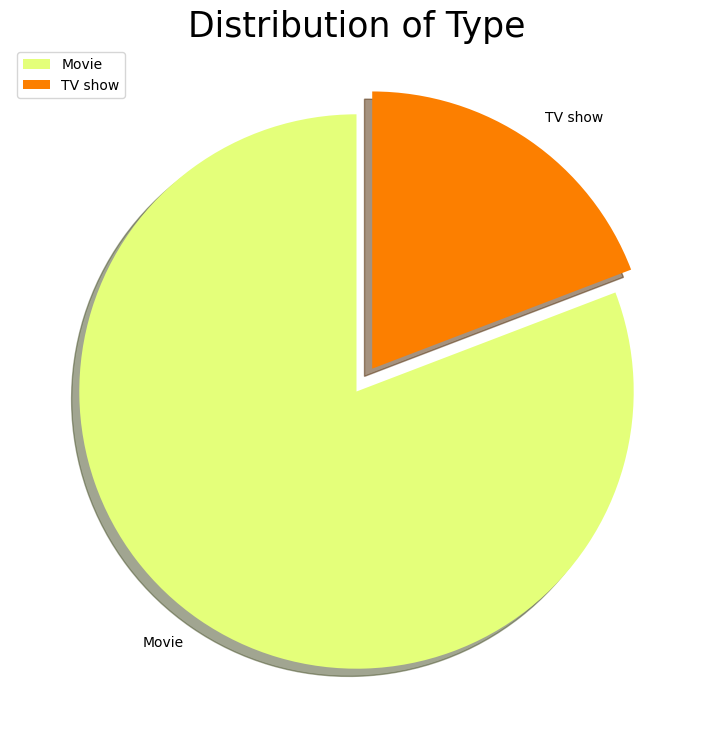

In [32]:
labels = ['Movie', 'TV show']
size = amazon['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

##### 5. Pie-chart for Rating

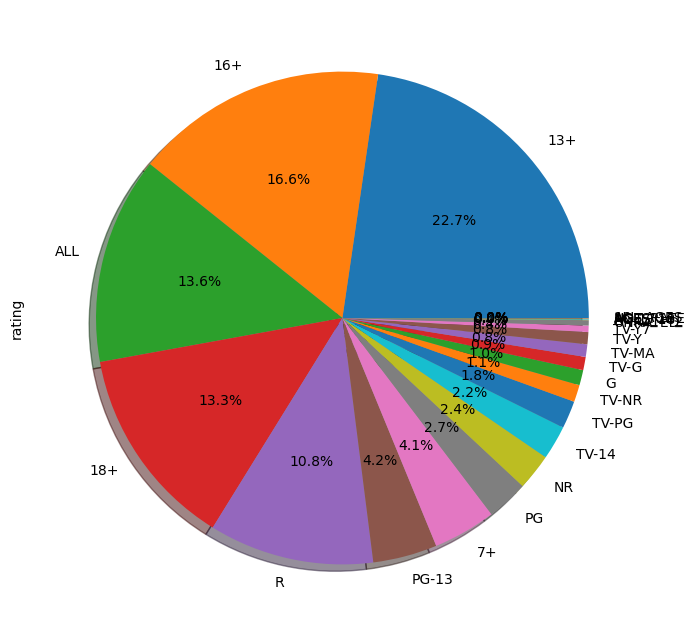

In [33]:
amazon['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# Word Cloud Amazon

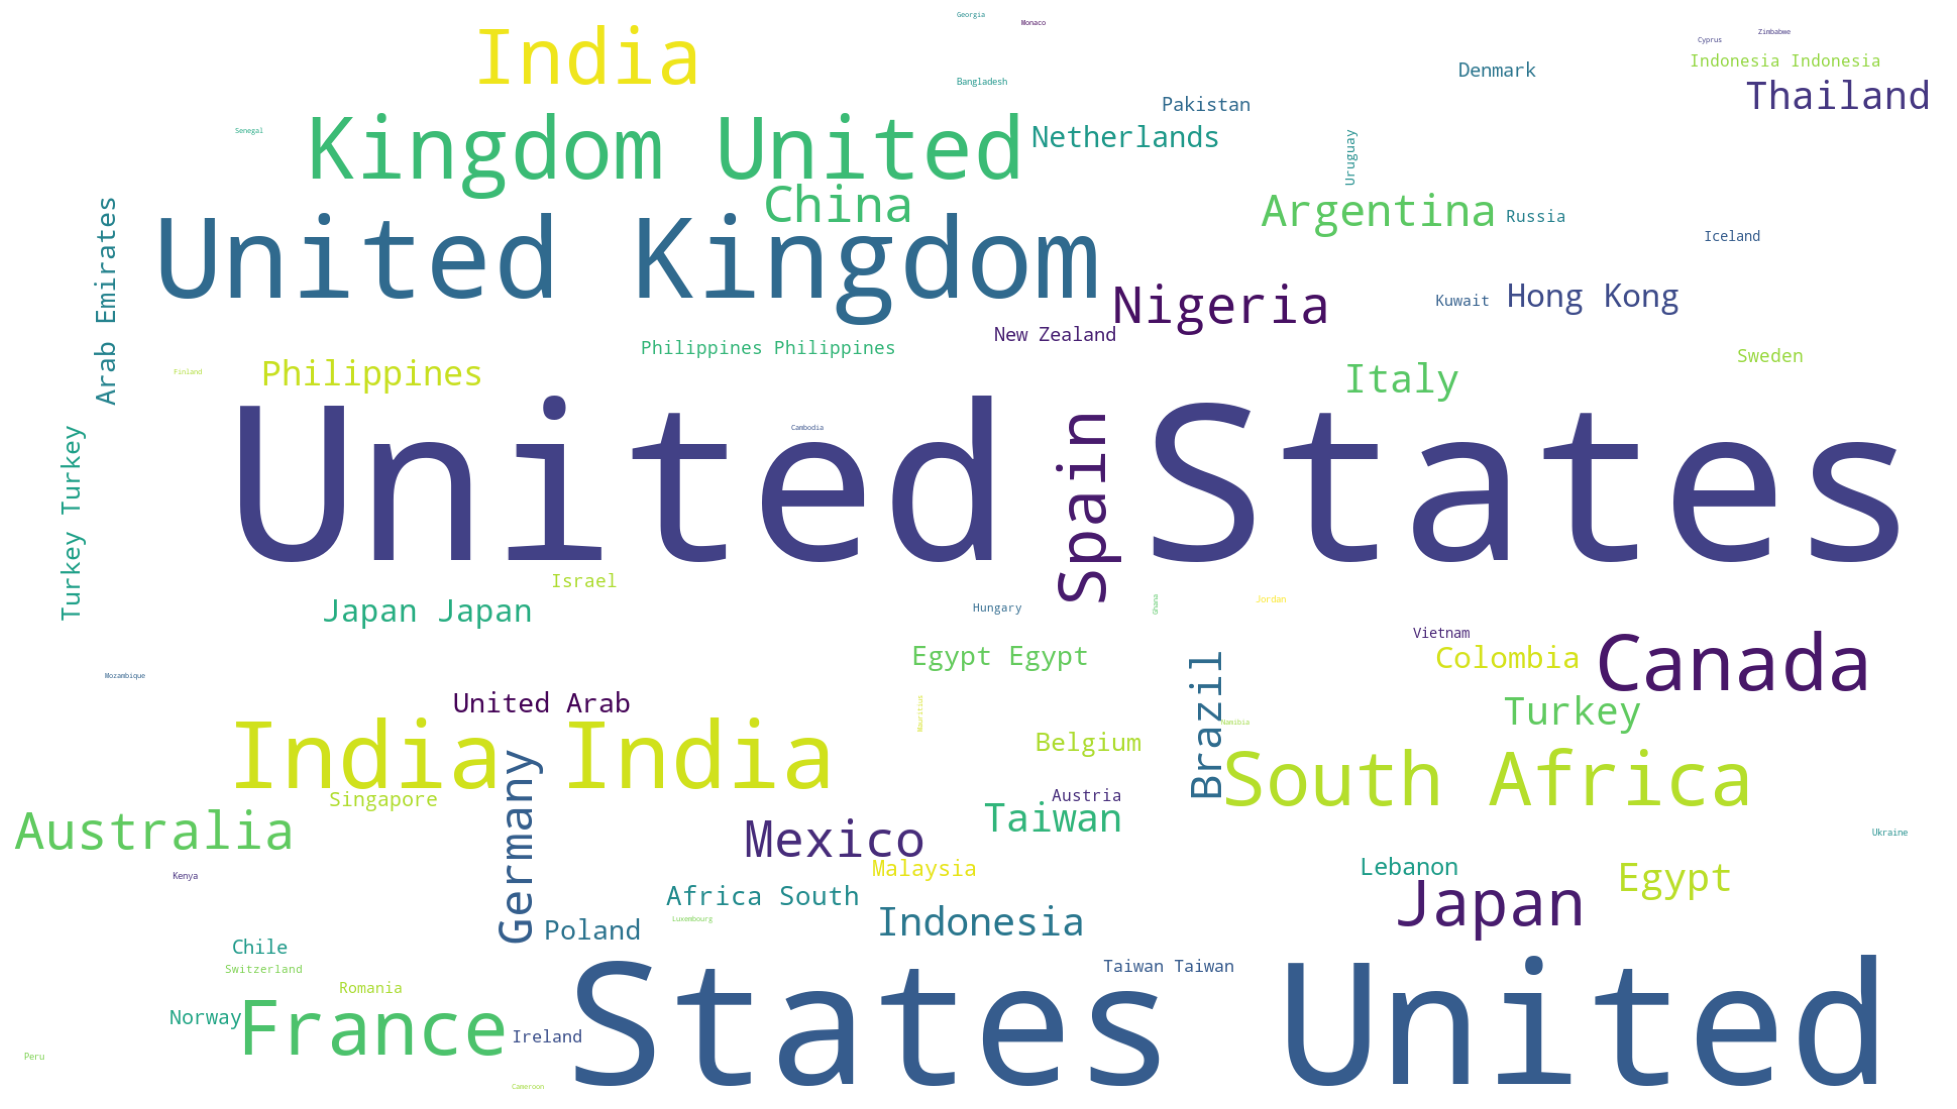

In [34]:
# Wordcloud of Countries

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_amazon.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country_amazon.png')
plt.show()

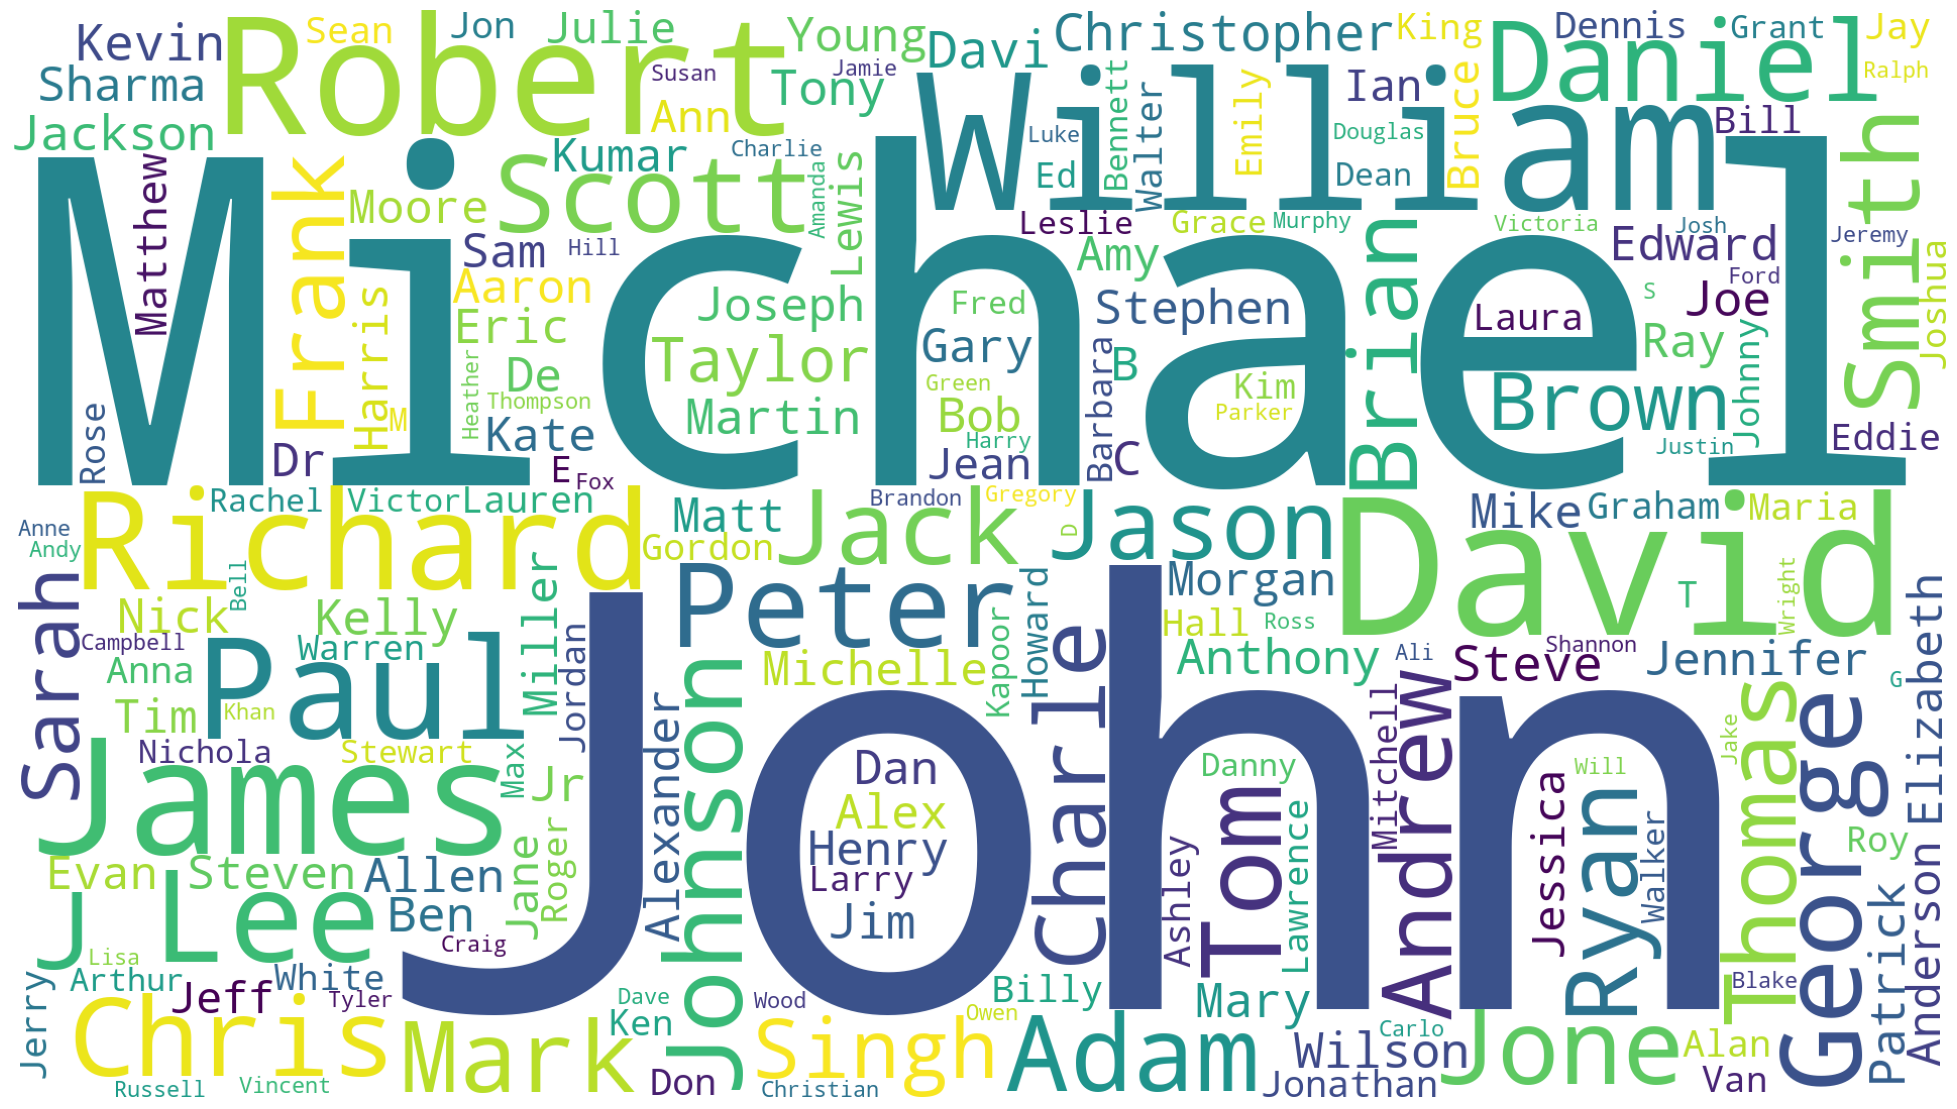

In [35]:
# Word Cloud of Cast in the Shows

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_amazon.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast_amazon.png')
plt.show()

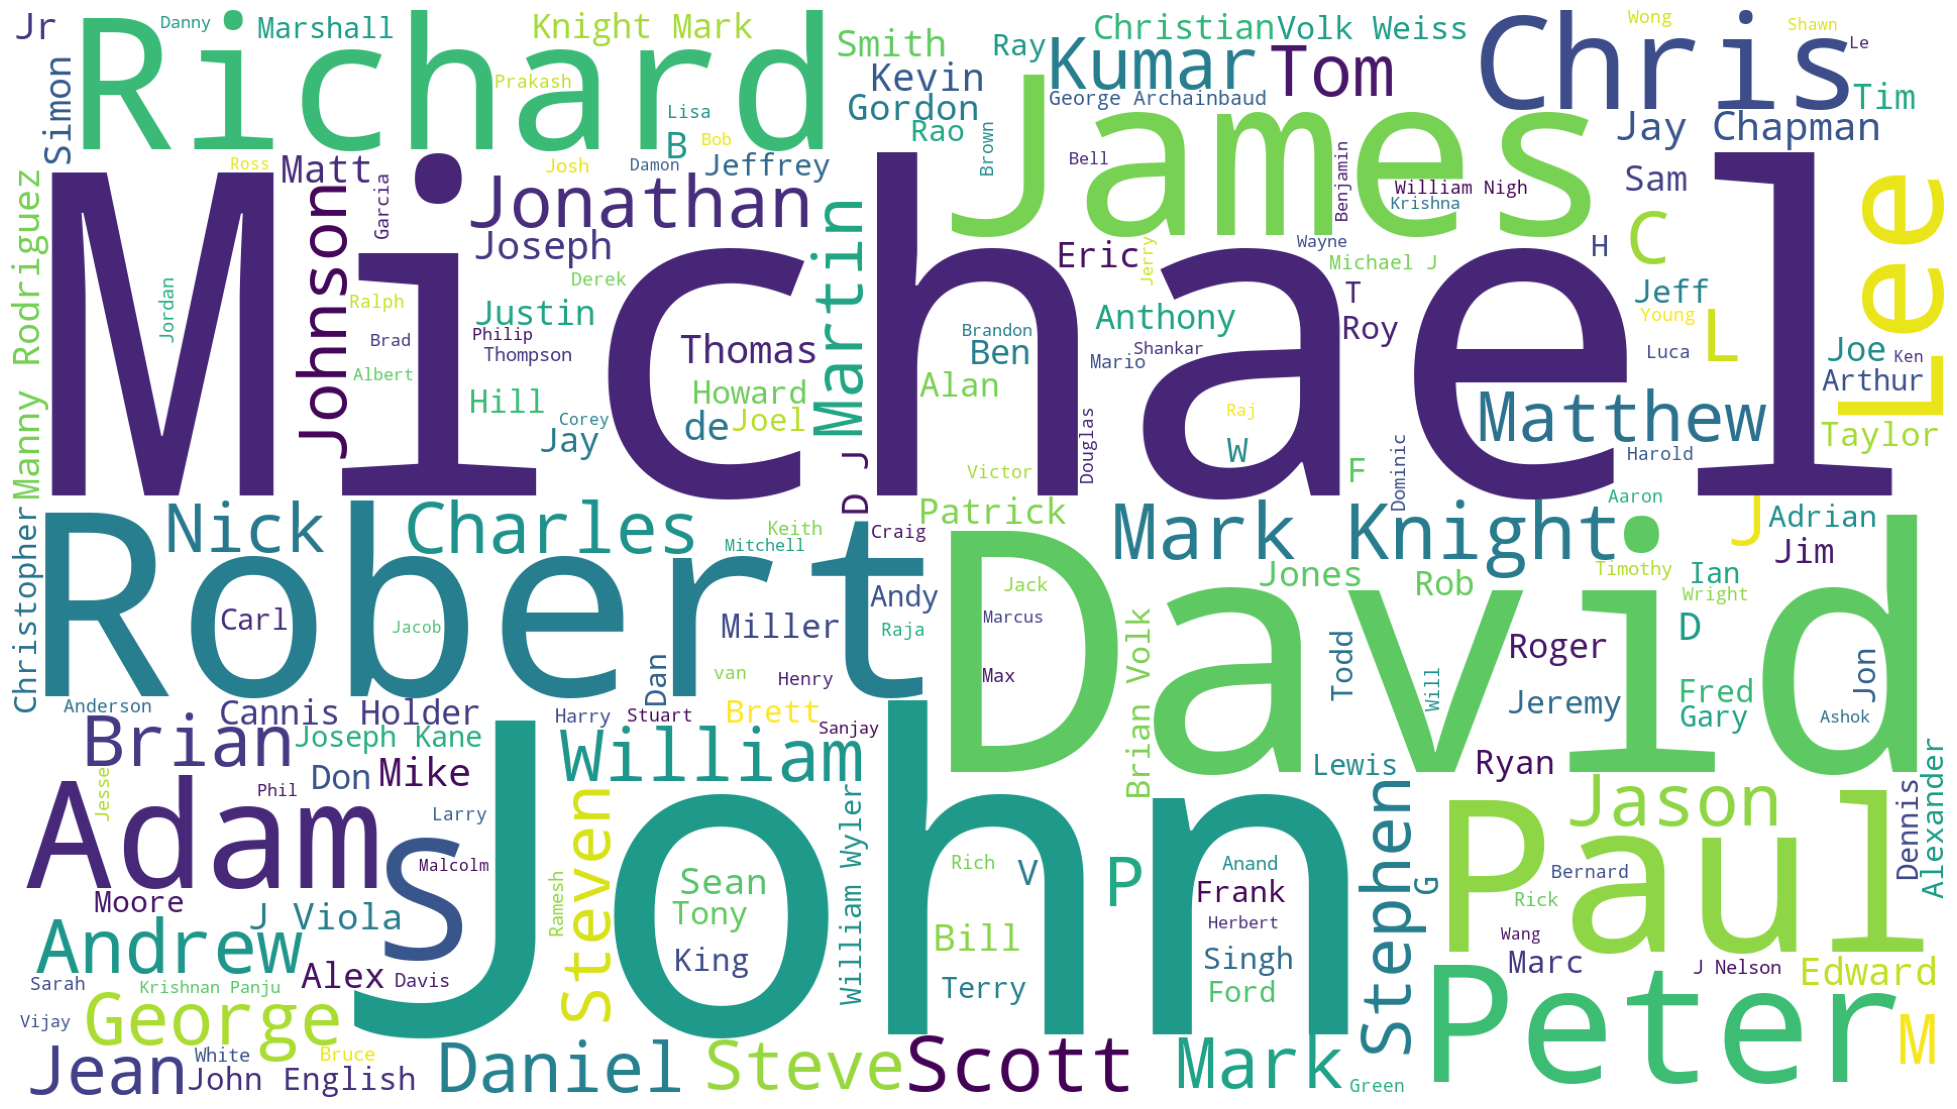

In [36]:
# Word Cloud of Directors 

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_amazon.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director_amazon.png')
plt.show()

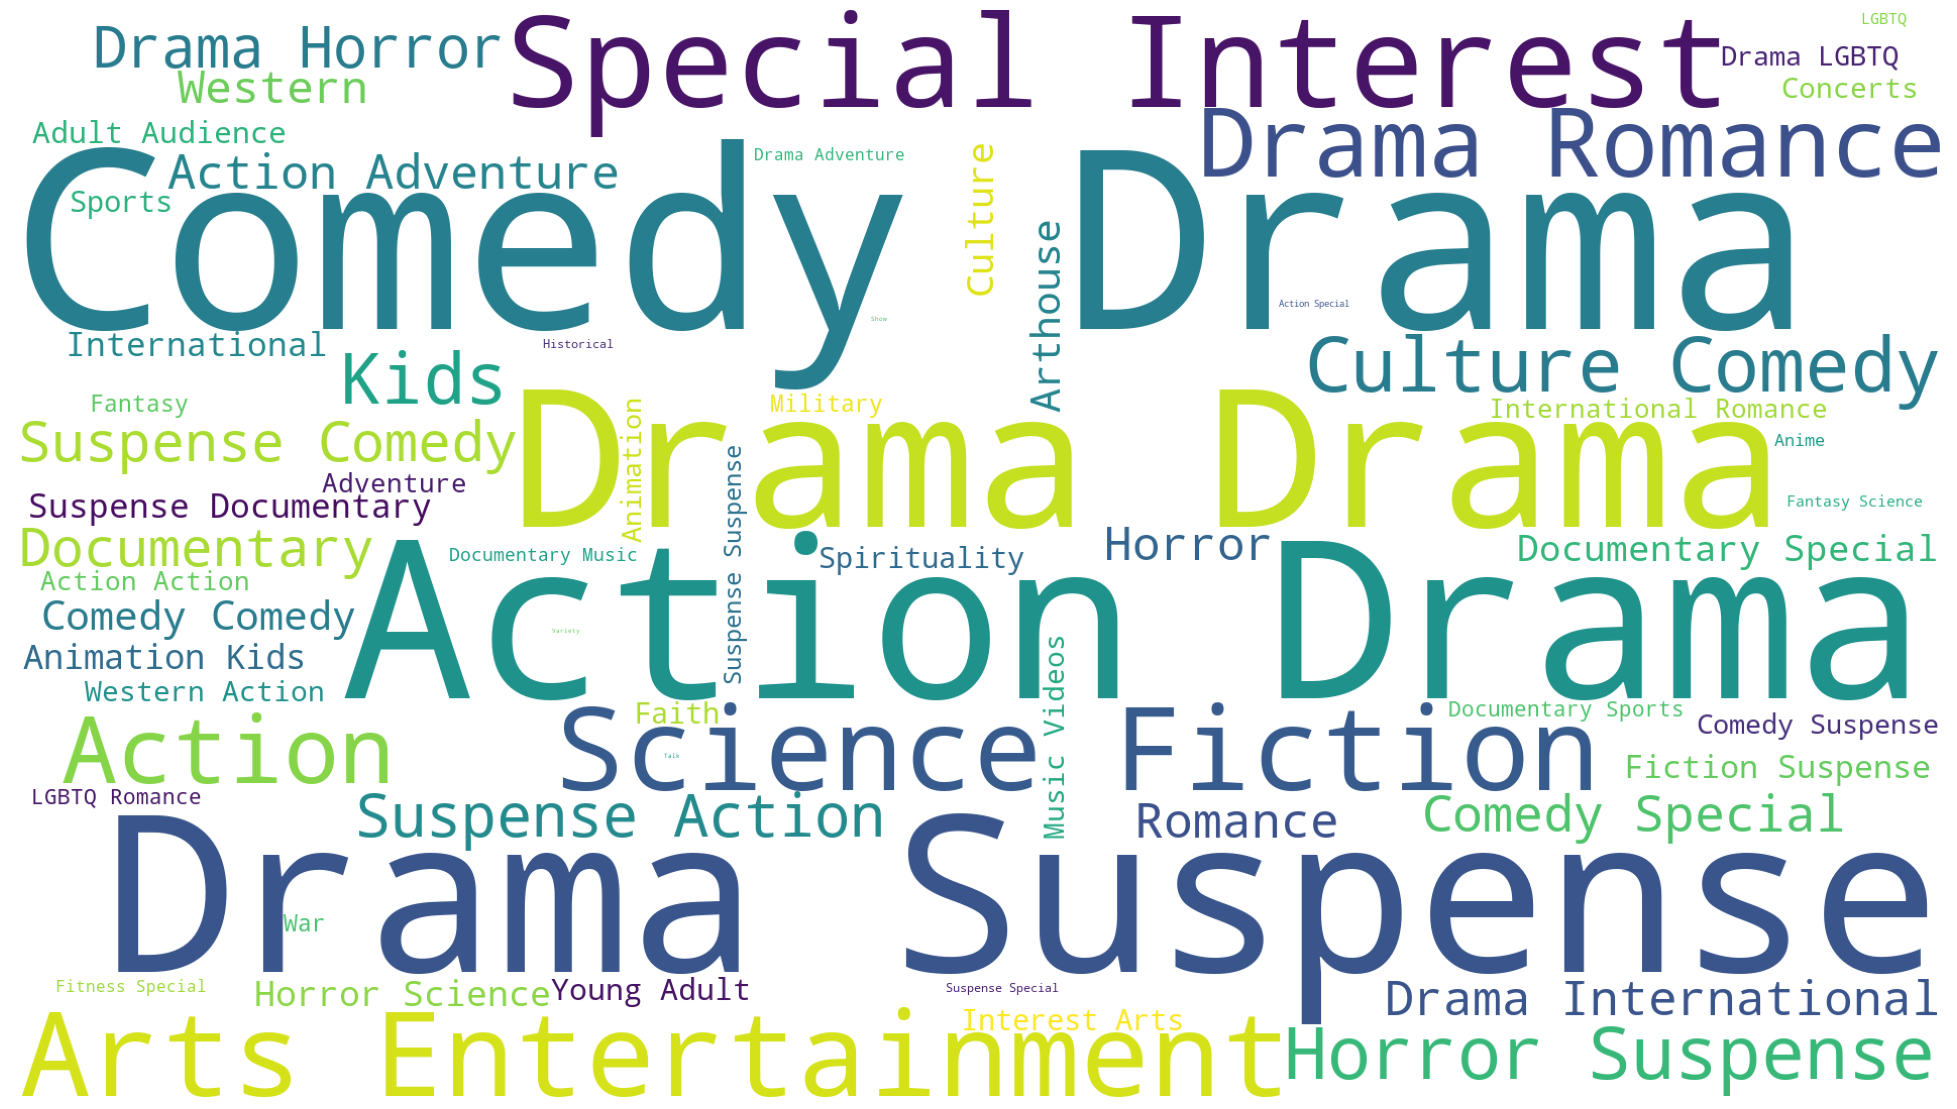

In [37]:
# Word Cloud of Categories

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_amazon.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category_amazon.png')
plt.show()

# Data Visualization on the merged data of Netflix and Amazon

In [38]:
# Adding a 'platform' column to Netflix dataset to identify them after merging
netflix["platform"] = "Netflix"
netflix

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description platform  
0     As her father nears the end of his life, filmm...  Netflix  
1     After crossing paths at a party, a Cape Town t...  Netflix  
2     To protect his family from a powerful drug lor...  Netflix  
3     Feuds, flirtations and toilet talk go down amo...  Netflix  
4     In a city of coaching centers known to train I...  Netflix  
...                                                 ...      ...  
8802  A political cartoonist, a crime reporter and a...  Netflix  
8803  While living alone in a spooky town, a young g...  Netflix  
8804  Looking to survive in a world taken over by zo...  Netflix  
8805  Dragged from civilian life, a former superhero...  Netflix  
8806  A scrappy but poor boy worms his way into a ty...  Netflix  

[8807 rows x 13 columns]

In [39]:
# Adding a 'platform' column to Amazon dataset to identify them after merging
amazon["platform"] = "Amazon"
amazon

show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1        s18  TV Show               Zoo Babies              NaN   
2         s2    Movie     Take Care Good Night     Girish Joshi   
3         s3    Movie     Secrets of Deception      Josh Webber   
4         s4    Movie       Pink: Staying True   Sonia Anderson   
...      ...      ...                      ...              ...   
9664   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9665   s9665  TV Show            Planet Patrol              NaN   
9666   s9666    Movie                  Outpost     Steve Barker   
9667   s9667  TV Show  Maradona: Blessed Dream              NaN   
9668   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast        country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent  United States   
1                            Narrator - Gillian Barlett          Egypt   
2      Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar  United States   
3     Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...  United States   
4     Interviews with: Pink, Adele, Beyoncé, Britney...            NaN   
...                                                 ...            ...   
9664                           Leo Gorcey, Bobby Jordan            NaN   
9665  DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...            NaN   
9666  Ray Stevenson, Julian Wadham, Richard Brake, M...            NaN   
9667  Esteban Recagno, Ezequiel Stremiz, Luciano Vit...            NaN   
9668  Michael Caine, Emily Mortimer, Joseph Gilgun, ...            NaN   

            date_added  release_year rating   duration  \
0       March 30, 2021          2014    NaN    113 min   
1         July 7, 2018          2008    ALL   1 Season   
2       March 30, 2021          2018    13+    110 min   
3       March 30, 2021          2017    NaN     74 min   
4       March 30, 2021          2014    NaN     69 min   
...                ...           ...    ...        ...   
9664      May 19, 2019          1940     7+     60 min   
9665     July 10, 2021          2018    13+  4 Seasons   
9666  January 20, 2019          2008      R     90 min   
9667     March 8, 2014          2021  TV-MA   1 Season   
9668   August 14, 2018          2010      R    103 min   

                    listed_in  \
0               Comedy, Drama   
1      Kids, Special Interest   
2        Drama, International   
3     Action, Drama, Suspense   
4                 Documentary   
...                       ...   
9664                   Comedy   
9665                 TV Shows   
9666                   Action   
9667            Drama, Sports   
9668  Action, Drama, Suspense   

                                            description platform  
0     A small fishing village must procure a local d...   Amazon  
1     A heart warming and inspiring series that welc...   Amazon  
2     A Metro Family decides to fight a Cyber Crimin...   Amazon  
3     After a man discovers his wife is cheating on ...   Amazon  
4     Pink breaks the mold once again, bringing her ...   Amazon  
...                                                 ...      ...  
9664  New York City street principles get an East Si...   Amazon  
9665  This is Earth, 2100AD - and these are the adve...   Amazon  
9666  In war-torn Eastern Europe, a world-weary grou...   Amazon  
9667  The series tells the story of Diego Maradona, ...   Amazon  
9668  Harry Brown, starring two-time Academy Award w...   Amazon  

[9669 rows x 13 columns]

### Merging both the datasets using the concat() function. In this case the merging was easily possible because the columns were same for both the datasets.

In [40]:
# Concatenation of Netflix and Amazon Dataset

netflix_amazon = pd.concat([netflix, amazon], ignore_index=True)

In [41]:
netflix_amazon

show_id     type                    title         director  \
0          s1    Movie     Dick Johnson Is Dead  Kirsten Johnson   
1          s2  TV Show            Blood & Water              NaN   
2          s3  TV Show                Ganglands  Julien Leclercq   
3          s4  TV Show    Jailbirds New Orleans              NaN   
4          s5  TV Show             Kota Factory              NaN   
...       ...      ...                      ...              ...   
18471   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
18472   s9665  TV Show            Planet Patrol              NaN   
18473   s9666    Movie                  Outpost     Steve Barker   
18474   s9667  TV Show  Maradona: Blessed Dream              NaN   
18475   s9668    Movie              Harry Brown    Daniel Barber   

                                                    cast        country  \
0                                                    NaN  United States   
1      Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2      Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                    NaN            NaN   
4      Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                  ...            ...   
18471                           Leo Gorcey, Bobby Jordan            NaN   
18472  DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...            NaN   
18473  Ray Stevenson, Julian Wadham, Richard Brake, M...            NaN   
18474  Esteban Recagno, Ezequiel Stremiz, Luciano Vit...            NaN   
18475  Michael Caine, Emily Mortimer, Joseph Gilgun, ...            NaN   

               date_added  release_year rating   duration  \
0      September 25, 2021          2020  PG-13     90 min   
1      September 24, 2021          2021  TV-MA  2 Seasons   
2      September 24, 2021          2021  TV-MA   1 Season   
3      September 24, 2021          2021  TV-MA   1 Season   
4      September 24, 2021          2021  TV-MA  2 Seasons   
...                   ...           ...    ...        ...   
18471        May 19, 2019          1940     7+     60 min   
18472       July 10, 2021          2018    13+  4 Seasons   
18473    January 20, 2019          2008      R     90 min   
18474       March 8, 2014          2021  TV-MA   1 Season   
18475     August 14, 2018          2010      R    103 min   

                                               listed_in  \
0                                          Documentaries   
1        International TV Shows, TV Dramas, TV Mysteries   
2      Crime TV Shows, International TV Shows, TV Act...   
3                                 Docuseries, Reality TV   
4      International TV Shows, Romantic TV Shows, TV ...   
...                                                  ...   
18471                                             Comedy   
18472                                           TV Shows   
18473                                             Action   
18474                                      Drama, Sports   
18475                            Action, Drama, Suspense   

                                             description platform  
0      As her father nears the end of his life, filmm...  Netflix  
1      After crossing paths at a party, a Cape Town t...  Netflix  
2      To protect his family from a powerful drug lor...  Netflix  
3      Feuds, flirtations and toilet talk go down amo...  Netflix  
4      In a city of coaching centers known to train I...  Netflix  
...                                                  ...      ...  
18471  New York City street principles get an East Si...   Amazon  
18472  This is Earth, 2100AD - and these are the adve...   Amazon  
18473  In war-torn Eastern Europe, a world-weary grou...   Amazon  
18474  The series tells the story of Diego Maradona, ...   Amazon  
18475  Harry Brown, starring two-time Academy Award w...   Amazon  

[18476 rows x 13 

In [42]:
# Saving the csv file in the same file directory as the Jupyter file.

netflix_amazon.to_csv('netflix_amazon.csv', index=False)

In [43]:
# Reindexing the columns

netflix_amazon = netflix_amazon.reindex(columns=['show_id', 'platform', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'])

In [44]:
netflix_amazon

show_id platform     type                    title         director  \
0          s1  Netflix    Movie     Dick Johnson Is Dead  Kirsten Johnson   
1          s2  Netflix  TV Show            Blood & Water              NaN   
2          s3  Netflix  TV Show                Ganglands  Julien Leclercq   
3          s4  Netflix  TV Show    Jailbirds New Orleans              NaN   
4          s5  Netflix  TV Show             Kota Factory              NaN   
...       ...      ...      ...                      ...              ...   
18471   s9664   Amazon    Movie      Pride Of The Bowery  Joseph H. Lewis   
18472   s9665   Amazon  TV Show            Planet Patrol              NaN   
18473   s9666   Amazon    Movie                  Outpost     Steve Barker   
18474   s9667   Amazon  TV Show  Maradona: Blessed Dream              NaN   
18475   s9668   Amazon    Movie              Harry Brown    Daniel Barber   

                                                    cast        country  \
0                                                    NaN  United States   
1      Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2      Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                    NaN            NaN   
4      Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                  ...            ...   
18471                           Leo Gorcey, Bobby Jordan            NaN   
18472  DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...            NaN   
18473  Ray Stevenson, Julian Wadham, Richard Brake, M...            NaN   
18474  Esteban Recagno, Ezequiel Stremiz, Luciano Vit...            NaN   
18475  Michael Caine, Emily Mortimer, Joseph Gilgun, ...            NaN   

               date_added  release_year rating   duration  \
0      September 25, 2021          2020  PG-13     90 min   
1      September 24, 2021          2021  TV-MA  2 Seasons   
2      September 24, 2021          2021  TV-MA   1 Season   
3      September 24, 2021          2021  TV-MA   1 Season   
4      September 24, 2021          2021  TV-MA  2 Seasons   
...                   ...           ...    ...        ...   
18471        May 19, 2019          1940     7+     60 min   
18472       July 10, 2021          2018    13+  4 Seasons   
18473    January 20, 2019          2008      R     90 min   
18474       March 8, 2014          2021  TV-MA   1 Season   
18475     August 14, 2018          2010      R    103 min   

                                               listed_in  \
0                                          Documentaries   
1        International TV Shows, TV Dramas, TV Mysteries   
2      Crime TV Shows, International TV Shows, TV Act...   
3                                 Docuseries, Reality TV   
4      International TV Shows, Romantic TV Shows, TV ...   
...                                                  ...   
18471                                             Comedy   
18472                                           TV Shows   
18473                                             Action   
18474                                      Drama, Sports   
18475                            Action, Drama, Suspense   

                                             description  
0      As her father nears the end of his life, filmm...  
1      After crossing paths at a party, a Cape Town t...  
2      To protect his family from a powerful drug lor...  
3      Feuds, flirtations and toilet talk go down amo...  
4      In a city of coaching centers known to train I...  
...                                                  ...  
18471  New York City street principles get an East Si...  
18472  This is Earth, 2100AD - and these are the adve...  
18473  In war-torn Eastern Europe, a world-weary grou...  
18474  The series tells the story of Diego Maradona, ...  
18475  Harry Brown, starring two-time Academy Award w...  

[18476 rows x 13 

# Data Visualization on the merged data

##### 1. Type: Movie and TV Shows - Netflix and Amazon combined

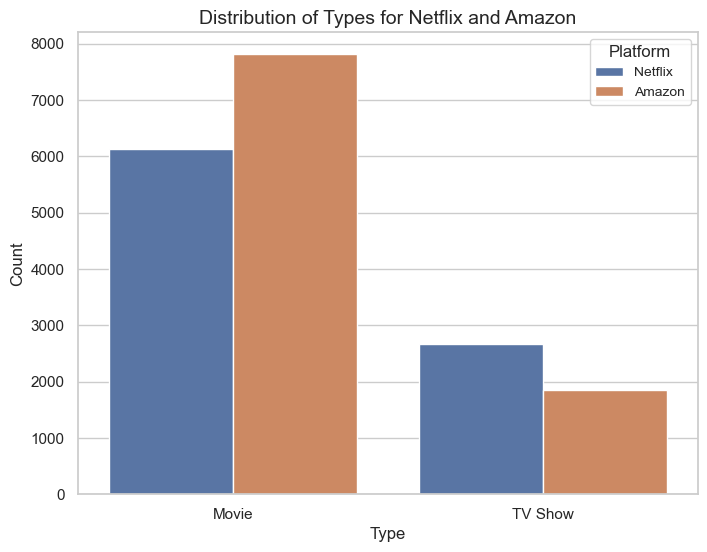

In [45]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x="type", hue="platform", data=netflix_amazon)
plt.title("Distribution of Types for Netflix and Amazon", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Platform", fontsize=10)
plt.show()


##### 2. Pie-chart for the Type: Movie and TV Shows - Netflix and Amazon combined

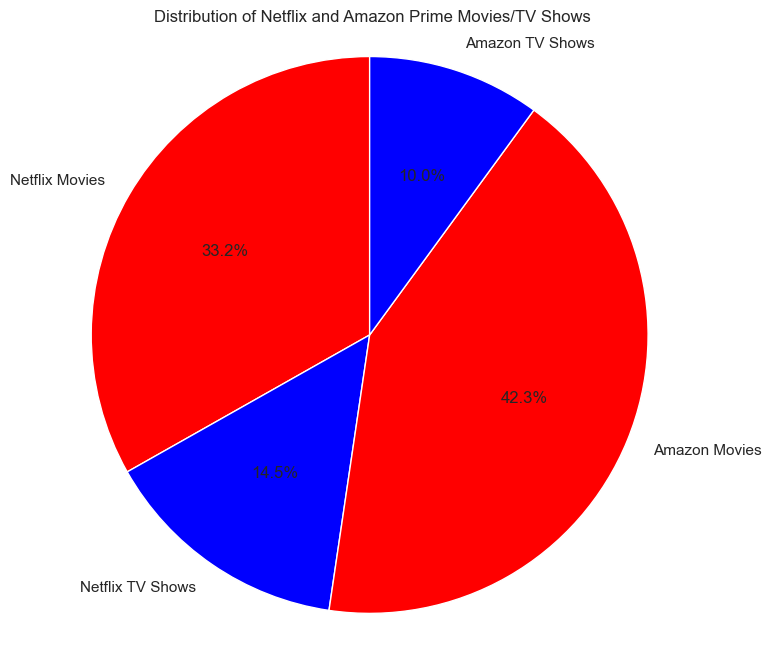

In [46]:
# calculate the count of each type for Netflix and Amazon Prime
netflix_count = netflix_amazon[netflix_amazon['platform'] == 'Netflix']['type'].value_counts()
amazon_count = netflix_amazon[netflix_amazon['platform'] == 'Amazon']['type'].value_counts()

# create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'blue']
ax.pie([netflix_count['Movie'], netflix_count['TV Show'], amazon_count['Movie'], amazon_count['TV Show']], 
       labels=['Netflix Movies', 'Netflix TV Shows', 'Amazon Movies', 'Amazon TV Shows'], 
       autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Distribution of Netflix and Amazon Prime Movies/TV Shows')
plt.show()


# Recommendation Analysis

##### !pip install rake_nltk installs the rake_nltk package, which is a Python implementation of the Rapid Automatic Keyword Extraction (RAKE) algorithm using the Natural Language Toolkit (NLTK) library.

In [47]:
!pip install rake_nltk

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Jay
[nltk_data]     Bhanushali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##### This  downloads the Punkt tokenizer data needed for natural language processing tasks such as tokenization (i.e., dividing text into smaller units like words or sentences) and part-of-speech tagging. The Punkt tokenizer is a pre-trained unsupervised machine learning model for tokenization that is provided by the Natural Language Toolkit (NLTK) library. By downloading the Punkt tokenizer, the NLTK library will be able to use it for various natural language processing tasks.

# Importing all the required libraries for Recommendation Analysis

In [49]:
import pandas as pd
from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
# Loading the Netflix Dataset using Pandas Dataframe

df = pd.read_csv('netflix_amazon.csv')

In [51]:
# Extracting only the required columns for Recommendation Analysis

df = df[['platform','title','type','listed_in','rating','director','cast','description']]
df.head()

platform                  title     type  \
0  Netflix   Dick Johnson Is Dead    Movie   
1  Netflix          Blood & Water  TV Show   
2  Netflix              Ganglands  TV Show   
3  Netflix  Jailbirds New Orleans  TV Show   
4  Netflix           Kota Factory  TV Show   

                                           listed_in rating         director  \
0                                      Documentaries  PG-13  Kirsten Johnson   
1    International TV Shows, TV Dramas, TV Mysteries  TV-MA              NaN   
2  Crime TV Shows, International TV Shows, TV Act...  TV-MA  Julien Leclercq   
3                             Docuseries, Reality TV  TV-MA              NaN   
4  International TV Shows, Romantic TV Shows, TV ...  TV-MA              NaN   

                                                cast  \
0                                                NaN   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

##### Below code will add a new column called "Key_words" to the existing DataFrame df. For each row it extracts important words or phrases from the 'description' column using RAKE Algorithm and stores in the Key_words column and drops the 'description' column.

In [52]:
df['Key_words'] = ""

for index, row in df.iterrows():
    plot = row['description']
    r = Rake()
    r.extract_keywords_from_text(plot)
    key_words_dict_scores = r.get_word_degrees()
    #a rating is also assigned to every word
    row['Key_words'] = list(key_words_dict_scores.keys())
    
df.drop(columns = ['description'], inplace = True)
df.head()

platform                  title     type  \
0  Netflix   Dick Johnson Is Dead    Movie   
1  Netflix          Blood & Water  TV Show   
2  Netflix              Ganglands  TV Show   
3  Netflix  Jailbirds New Orleans  TV Show   
4  Netflix           Kota Factory  TV Show   

                                           listed_in rating         director  \
0                                      Documentaries  PG-13  Kirsten Johnson   
1    International TV Shows, TV Dramas, TV Mysteries  TV-MA              NaN   
2  Crime TV Shows, International TV Shows, TV Act...  TV-MA  Julien Leclercq   
3                             Docuseries, Reality TV  TV-MA              NaN   
4  International TV Shows, Romantic TV Shows, TV ...  TV-MA              NaN   

                                                cast  \
0                                                NaN   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   

                                           Key_words  
0  [father, nears, end, life, filmmaker, kirsten,...  
1  [crossing, paths, party, cape, town, teen, set...  
2  [protect, family, powerful, drug, lord, skille...  
3  [feuds, flirtations, toilet, talk, go, among, ...  
4  [city, coaching, centers, known, train, india,...

In [53]:
# This checks the total number of null values in each of the columns

df.isnull().sum()

platform        0
title           0
type            0
listed_in       0
rating        341
director     4717
cast         2058
Key_words       0
dtype: int64

In [54]:
# This will fill the missing values in the 'cast', 'director', and 'rating' columns with empty strings

df['cast'] = df['cast'].fillna('')
df['director'] = df['director'].fillna('')
df['rating'] = df['rating'].fillna('')

df['cast'] = df['cast'].map(lambda x: x.split(',')[:3])
df['director'] = df['director'].map(lambda x: x.split(',')[:3])

In [55]:
# TO check whether there are still null values in the columns we have extracted.

df.isnull().sum()

platform     0
title        0
type         0
listed_in    0
rating       0
director     0
cast         0
Key_words    0
dtype: int64

In [56]:
# This converts values in 'listed_in' column to lower case and seperates the strings seperated by comma

df['listed_in'] = df['listed_in'].map(lambda x: x.lower().split(','))
df.head()

platform                  title     type  \
0  Netflix   Dick Johnson Is Dead    Movie   
1  Netflix          Blood & Water  TV Show   
2  Netflix              Ganglands  TV Show   
3  Netflix  Jailbirds New Orleans  TV Show   
4  Netflix           Kota Factory  TV Show   

                                           listed_in rating  \
0                                    [documentaries]  PG-13   
1  [international tv shows,  tv dramas,  tv myste...  TV-MA   
2  [crime tv shows,  international tv shows,  tv ...  TV-MA   
3                          [docuseries,  reality tv]  TV-MA   
4  [international tv shows,  romantic tv shows,  ...  TV-MA   

            director                                          cast  \
0  [Kirsten Johnson]                                            []   
1                 []    [Ama Qamata,  Khosi Ngema,  Gail Mabalane]   
2  [Julien Leclercq]  [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy]   
3                 []                                            []   
4                 []    [Mayur More,  Jitendra Kumar,  Ranjan Raj]   

                                           Key_words  
0  [father, nears, end, life, filmmaker, kirsten,...  
1  [crossing, paths, party, cape, town, teen, set...  
2  [protect, family, powerful, drug, lord, skille...  
3  [feuds, flirtations, toilet, talk, go, among, ...  
4  [city, coaching, centers, known, train, india,...

In [57]:
# This converts each value in the column to lower case and removes spaces

for index, row in df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
for index, row in df.iterrows():
    row['director'] = [x.lower().replace(' ','') for x in row['director']]
for index, row in df.iterrows():
    row['listed_in'] = [x.lower().replace(' ','') for x in row['listed_in']]

In [58]:
# It converts all the text to lower case, removes hyphens and splits text by commas

df['rating'] = df['rating'].map(lambda x: x.lower())
df['rating'] = df['rating'].map(lambda x: x.replace('-',''))
df['type'] = df['type'].map(lambda x: x.lower())
df['type'] = df['type'].map(lambda x: x.replace(' ',''))
df['type'] = df['type'].map(lambda x: x.lower().split(','))
df['rating'] = df['rating'].map(lambda x: x.lower().split(','))
df['platform'] = df['platform'].map(lambda x: x.lower())

In [59]:
# Creating a new column named 'bag of words' and has all the words used for text classification and sentiment Analysis

df['bag_of_words'] = ''
columns = ['platform', 'type', 'listed_in', 'rating', 'director', 'cast']
for index, row in df.iterrows():
    words = ''
    for col in columns:
        words = words + ' '.join(row[col])+ ' '
    row['bag_of_words'] = words
    
df.drop(columns = [col for col in df.columns if col not in ['title', 'platform', 'type', 'bag_of_words']], inplace = True)

In [60]:
# This makes the 'title' column, indedx of the DataFrame.

df.set_index('title', inplace = True)

In [61]:
# Printing 5 random values of the resulting dataframe

df.head()

platform      type  \
title                                      
Dick Johnson Is Dead   netflix   [movie]   
Blood & Water          netflix  [tvshow]   
Ganglands              netflix  [tvshow]   
Jailbirds New Orleans  netflix  [tvshow]   
Kota Factory           netflix  [tvshow]   

                                                            bag_of_words  
title                                                                     
Dick Johnson Is Dead   n e t f l i x movie documentaries pg13 kirsten...  
Blood & Water          n e t f l i x tvshow internationaltvshows tvdr...  
Ganglands              n e t f l i x tvshow crimetvshows internationa...  
Jailbirds New Orleans  n e t f l i x tvshow docuseries realitytv tvma     
Kota Factory           n e t f l i x tvshow internationaltvshows roma...

In [62]:
# This is a text processing tool in Scikit-learn library used for counting the frequency of words in a dataframe 

count = CountVectorizer()
count_matrix = count.fit_transform(df['bag_of_words'])

indices = pd.Series(df.index)
indices[:5]

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [63]:
# generating the cosine similarity matrix
# comparing bag_of_words of every title with every other title creating nxn matrix where n is total number of rows(titles)
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.20412415, 0.        ,
        0.1767767 ],
       [0.        , 1.        , 0.3354102 , ..., 0.        , 0.26726124,
        0.        ],
       [0.        , 0.3354102 , 1.        , ..., 0.        , 0.23904572,
        0.        ],
       ...,
       [0.20412415, 0.        , 0.        , ..., 1.        , 0.        ,
        0.28867513],
       [0.        , 0.26726124, 0.23904572, ..., 0.        , 1.        ,
        0.13363062],
       [0.1767767 , 0.        , 0.        , ..., 0.28867513, 0.13363062,
        1.        ]])

In [64]:
# This defines a function called 'recommendations' for returning a list of recommended movies using cosine similarity matrix

def recommendations(title, cosine_sim=cosine_sim):
    recommended_movies = []
    idx_filter = indices == title
    if not idx_filter.any():
        return recommended_movies
    idx = idx_filter.index[idx_filter][0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    top_10_indexes = list(score_series.iloc[1:11].index)
    for i in top_10_indexes:
        recommended_movies.append((list(df.index)[i], df.iloc[i]['platform'].capitalize(), [x.capitalize() for x in df.iloc[i]['type']]))
    return recommended_movies


# Time for some Recommendations

- Midnight Mass
- My Little Pony: A New Generation
- Sankofa
- The Great British Baking Show
- The Starling
- Let There Be Light
- Landscape Artist of the Year
- Kanave Kalaiyadhe
- Jack'd Up
- If You Give a Mouse a Cookie

##### Method 1

In [72]:
recommendations_list = recommendations('Midnight Mass')

if not recommendations_list:
    print("We are updating the Database. Please come back later.")
else:
    for rec in recommendations_list:
        title = rec[0]
        platform = rec[1]
        content_type = rec[2][0]
        print(f"Title: {title}\nPlatform: {platform}\nContent type: {content_type}\n")


Title: Penny Dreadful
Platform: Netflix
Content type: Tvshow

Title: Ratched
Platform: Netflix
Content type: Tvshow

Title: The Haunting of Hill House
Platform: Netflix
Content type: Tvshow

Title: The Mist
Platform: Netflix
Content type: Tvshow

Title: Brand New Cherry Flavor
Platform: Netflix
Content type: Tvshow

Title: The Haunting of Bly Manor
Platform: Netflix
Content type: Tvshow

Title: Re:Mind
Platform: Netflix
Content type: Tvshow

Title: Homemade
Platform: Netflix
Content type: Tvshow

Title: Zindagi in Short
Platform: Netflix
Content type: Tvshow

Title: Forget Me Not
Platform: Netflix
Content type: Tvshow



##### Method 2:

In [73]:
import tkinter as tk

def get_recommendation():
    title = entry.get()
    if title not in df.index:
        recommendations_label.config(text="We are updating the Database. Please come back later.")
    else:
        recommendations_list = recommendations(title)
        recommendations_text = ""
        for rec in recommendations_list:
            title = rec[0]
            platform = rec[1]
            content_type = rec[2][0]
            recommendations_text += f"Title: {title}\nPlatform: {platform}\nContent type: {content_type}\n\n"
        recommendations_label.config(text=recommendations_text)

# Create the main window
root = tk.Tk()
root.title("Movie/TV Show Recommendation System")

# Create the widgets
label = tk.Label(root, text="Enter a movie/TV show title:")
entry = tk.Entry(root, width=50)
button = tk.Button(root, text="Get Recommendations", command=get_recommendation)
recommendations_label = tk.Label(root, text="", justify="left")

# Add the widgets to the window
label.pack(pady=(20, 0))
entry.pack(pady=(0, 20))
button.pack()
recommendations_label.pack()

# Run the main event loop
root.mainloop()
